# Project title: Interlocking-Directorates Network Reconstruction

## Introduction

### Foreword

The project is a continuation of my academic work, where during my PhD and later on, 
together with my supervisor prof. Lucio Biggiero, we have studied and analysed the European Aerospace Industry Network (EASIN).
In more detail it can be defined as an inter-firm network analysis of an industry 
geographically from EU28 (as of 2019) and industrially as Aerospace Manufacturing (NACE:3030).
The deep analysis of networks of interlocking-directorates, interlocking-departments and hybrid-interlocks made between EASIN 
itself and its partners (from the whole world and from variety of industries) 
can be found in our book recently published book (linked below).

###### Book: https://link.springer.com/book/9783031173882

### Problem definition

Interlocking inter-firm networks  are systems where strategic and operative knowledge flow 
governing and coordinating the structure of inter-firm relations, having access to insights on the structure,
which provides capability to position oneself more centrally, may turn out to be an invaluable business knowledge.

At the same time, public anti-trust/anti-monopoly institutions use interlocking-directorates as a foundation 
for inspecting if corporate businesses illegally co-operate forming larger, hidden business-groups 
and thus potentially distort free competition in open markets. Providing them with a tool 
able to predict existance of potentially damaging connections 
(considered as such could be all the false-positives achieved with a reasonably high threshold) 
could also prove significantly important. More information can be found in my recent article publication (link below).

The data available for carrying out research is not always fully available and is often internally inconsistent.
This creates a situation, where in some contexts network reconstruction seems like the only way to predict how a network 
structure would look like had we had access to complete affiliation information, provided we can access other data - 
such as economic attributes (size and performance) and geolocation, which nonetheless should be widely available.


######  Article: Magnuszewski, R. 2022. The true relational significance of listed companies in the European Aerospace Industry: a board interlocks case-study. Conference paper. (still being published, link will be provided later)

### Data

#### Data source

The data has been collected through Bureau van Dijk ORBIS database (link below). It is divided into three separate datasets for convenience, the first set includes all the 1173 EASIN companies (as of 2022) with information on affiliations (directors and managers), the second set includes the economic attributes data, the third set includes geolocation data. 

Due to limited license only the Very-Large, Large and Medium companies were included, without the Small and Micro ones (their classification is presented in the guide - link below). However, based on our analysis (see book above) we know that the smallest ones do not interlock almost at all. 

###### ORBIS Website: https://www.bvdinfo.com/en-gb/our-products/data/international/orbis)
###### ORBIS guide: https://www2.bib.uni-mannheim.de/fileadmin/ub/pdf/Fachref/BWL/OrbisInternetUserGuide.pdf

#### Data definition

##### Affiliation data

- 'Company name Latin alphabet': Company name
- 'BvD ID number': Unique BvD identifier, which can be used to locate again the company in the database. It is much more reliable, when compared to company name, because the data is being regularly updated and names may also change at times.
- 'DM UCI (Unique Contact Identifier)': Similarly as above, instead of using names it is more robust to use each person's identifier.
- 'DM Type of role': A role which person holds in each company. There are many different roles, for the sake of simplifying the dataset all the roles that include abbreviation 'BoD' (Board of Directors) are assigned as 'Directors', all the other roles are assinged as 'Managers'. 

#####  Economic attributes data 

The economic attributes may turn out to be useful due to assortativity - in the literature and in our book - it is shown that size of companies may matter and for example Very-Large companies may tend to interlock with Medium ones, Large may interlock usually with each other, etc. Additionally, literature on interlocks has studied carefully relation between interlocking and firms' performance, concluding that their correlation is not entirely clear, some studies reported positive, some negative and other explicitly neutral dependence - in this study they are kept also for the reason of checking, their weights will be extracted from the Logistic Regression model.


Although the dataset included more information, mentioned are only those that were used in the project (except for NACE and Listing status, which are included to provide definition of classification). 
All of them are used for the last year available, usually it is 2022, but not always. The currency is given in USD.

Categorical:
- 'NACE Rev. 2, core code (4 digits)': NACE code according to EU Commission definition (https://ec.europa.eu/eurostat/documents/3859598/5902521/KS-RA-07-015-EN.PDF)
- 'Listing status': 'Listing' 

Size:
- 'Operating revenue (Turnover)': 'TURN' 
- 'Cash flow: 'CF'
- 'Total assets: 'TASS'
- 'Shareholders funds': 'EC' (defined by us as Equity Capital)
- 'Number of employees': 'EM' 

Performance:
- 'P/L before tax': 'P/L_bef_tax' - Profit/Loss for the year before taxes
- 'P/L for period [=Net income]': 'Net_inc' - Profit/Loss for the year after taxes
- 'Current ratio': 'Ratio' - Current assets / Current liabilities 
- 'Profit margin (%)': 'Prof_marg' - (Profit before tax / Operating revenue) * 100
- 'ROE using P/L before tax (%)': 'ROE' - (Profit (Loss) for period / Shareholders funds) * 100 
- 'ROCE using P/L before tax (%)': 'ROCE' - (Profit (Loss) for period + Interest Paid) / (Shareholders Funds + Non­Current Liabilities) * 100 
- 'Solvency ratio (Asset based) (%)': 'Solvency' - (Shareholders funds / Total assets) * 100 

##### Geographical data 

- 'Country ISO code': 'Country_Code' - Short abbreviation representing a country, prefered to keep less information in strings
- 'Country': 'Country' - full name of a country, kept to check when an abbreviation would not be clear  
- 'City': 'City'
- 'Postcode': 'Postcode'
- 'Address line 1': 'Street'

### Methodology for data processing

The project has been inspired by Mungo et al. (2022), where authors reconstructed a global trade network.

###### Mungo, L., Lafond, F., Astudillo-Estevez, P. & Doyne Farmer, J. 2022. Reconstructing production networks using machine learning. Institute for New Economic Thinking at the Oxford Martin School. Working paper.

#### Affiliation data processing

The data has been processed with parts of my own software, that should be openly available at some point, when finished.
It uses raw data file exported by ORBIS, processes columns by f.e. filling up their missing values when necessary, converting role information into particular position, and converts 2-mode company-employee affiliation into a weighted company-company link. Weights in links do occur when there are more than 1 employees shared between any two companies. 

The available options include creating board-interlock networks (BINT) where companies share directors, 
department-interlock networks (DINT) where companies share managers (from executives to lower level ones),
and hybrid-interlock networks (HINT) where a link is formed if one person is a director in one company and a manager in another, thus creating an asymmetric relation. For now the project focuses only on BINTs.

The final dataset includes the such created links which will represent class '1'. Class '0' is created by generating all of the not-present, but possible, links between all of the companies in the dataset. They are presented in a format:
source-target-weight, where weight >0 is later converted into binary 1. The links are symmetrised, because board-interlocks are undirected.

#### Economic data processing

The data is visualised, the NaNs are filled up with respective medians, and each economic attribute is scaled using logarithmisation or standard scaling, depending on its individual distribution.

#### Geographical data processing

The goal is to have all the geographical location points for each company, for simplicity and because of using free geolocation-API the choice was settled with using only cities and countries - on a European scale such approximation seems reasonable. The missing data was filled up using post-codes, address or NUTS code.

Using that information a set of dyadic features, f.e. distance, could be calculated. It is according to the literature that far distances are considered detrimental for a director's performance, because they don't allow him for frequent visits at a board's meetings and so interlocks between closer companies are preferred.

Another dyadic feature generated with the use of location is same-cluster membership, where using DBSCAN and playing with its two hyperparameters - maximum distance and minimum number of points per cluster - it was possible to recreate a very approximate number and location of the actual European aerospace industrial clusters (link for the actual map provided by the EACP is included next to the DBSCAN). Distance alone is an important information, however, when clusters are included as well they show that companies not only are close to each other, but they belong to a cluster of many other close-by companies. This should significantly increase likelihood of being interlocked - it has also been confirmed by literature. It is because clusters rely on close co-operation and thus need to be coordinated by people, preferably those responsable for strategic decisions. It is important to keep the distance and cluster features separated, because not all interlocked companies must be clustered, but it is still likely that they will be close to each other.

The third dyadic feature is same-country membership. According to the apriori knowledge, which is presented in the already mentioned book, board-interlocks tend to occur within same-country environment (picture below). It is probably because of legal regimes and country-specific business groups (Airbus - France, Leonardo - Italy, BAE Systems - the UK, etc.). Two companies could be close to each other - like in the old Benelux region, but they would not be within the same country and so would rather not be interlocked. 

###### EASIN (2019) interlocking-directorates network with categorisation per country

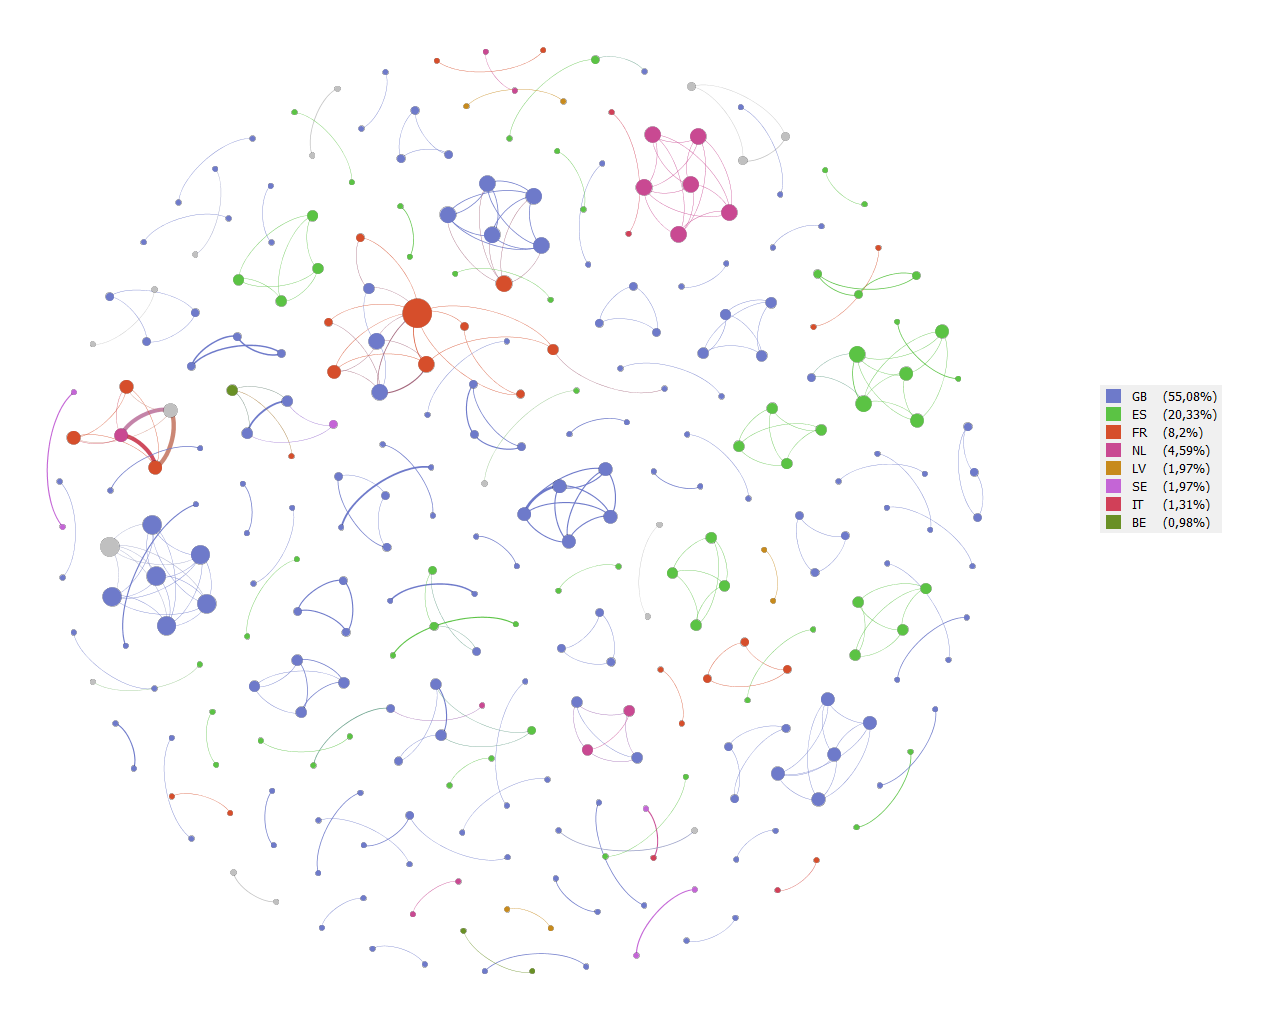

#### Final dataset

The final dataset is a merge of all the three datasets, where links (source-target-weight) were the foundation, and upon them were merged attributes separately for a source and a target. The final structure is as follows: couple - used as index, to represent and monitor which two companies are included in each link, but this information should not be used as a feature; individual features of both source and target companies; dyadic features per each link; weight converted to binary link (or its absence).

One additional dyadic-feature was added, same-first word of a company name - companies from a high-tech industry usually interlock within the same business groups and use directors to coordinate strategically their own subsidiaries, the information on business group membership is usually embraced in a first word of a company name (f.e. Airbus, Airbus SE, Airbus SAS, Airbus Operations, etc. - as presented in EASIN 2019 interlocking-directorates extract shown below)

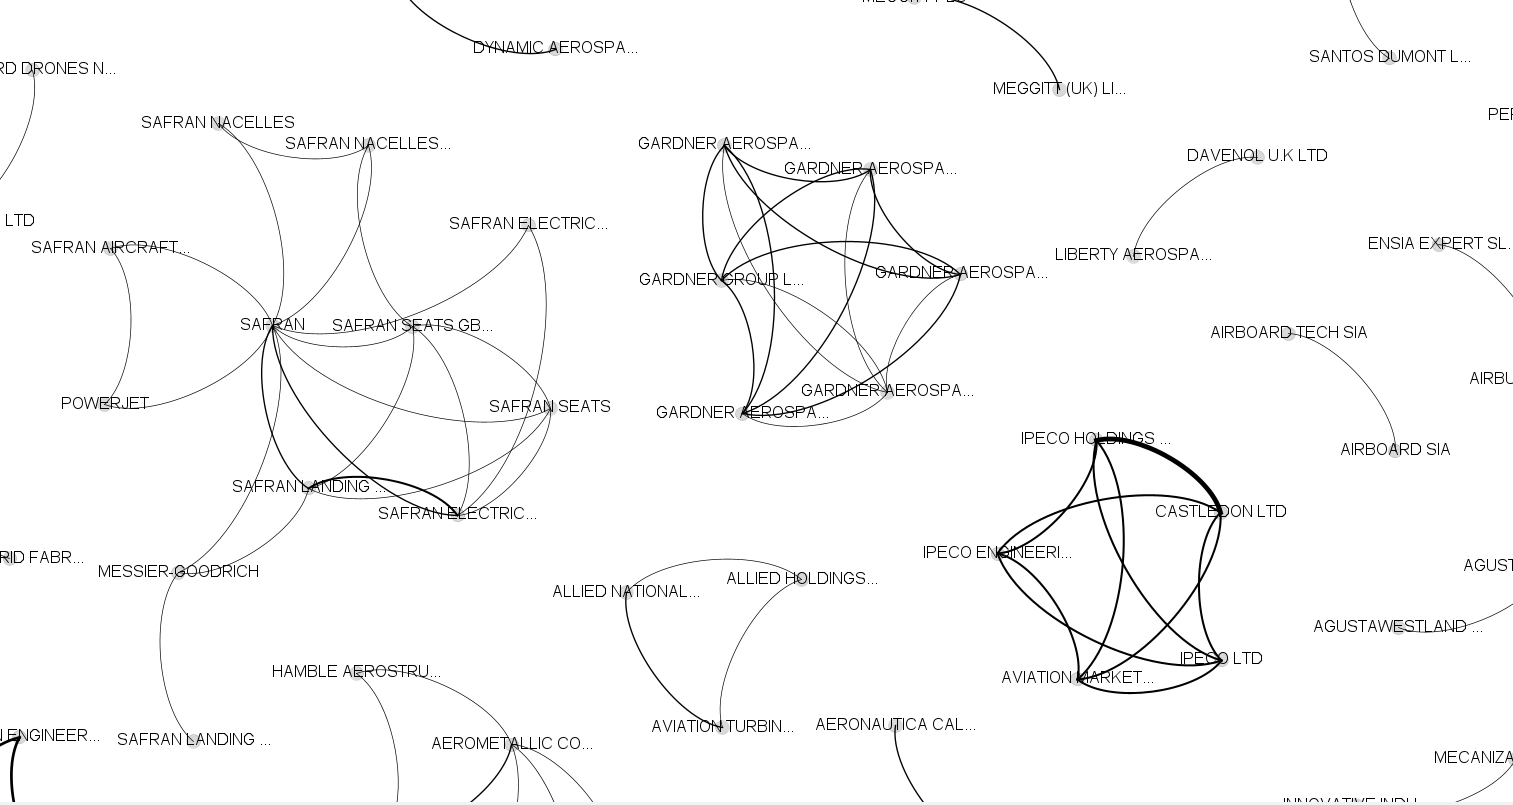

### Modelling

#### Preparation for modelling -  Undersampling (NearMiss-1)

Considering that the interlocking networks (or actually any economic inter-firm networks for that matter) have usually very low density (about 0.1%), the same holds for the network used in this project. There are only 5,152 links (although they should be divided by 2, for the sake of this project each undirected link is treated as two symmetric links - A -> B and B -> A) out of 1,334,756 possible ones (the number of possible links is n*(n-1), in this case 1,173 * 1,172), thus returning 0.3% of relative density.

The ratio of class 0 (missing link) to class 1 (present link) was therefore 0: 1369604 to 1: 5152, which is 265:1. The article by Mungo at el. (2022) considered 20:1 and 50:1, however based on experiments, and also considered by literature as sufficient, 10:1 ratio also gave good results. The undersampling method was based on keeping class 0 observations that are similar to class 1 (more on that in the respective section).  

#### Train/Test split

Was carried out in a standard fashion - 0.7/0.3 proportion with stratify parameter.

#### Classification models

Being a case of simple, binary classification the models used were:
- Linear Logistic Regression
- Random Forest Classification
- Gradient Boosting Classification (recommended by Mungo et al. (2022))

In each case tested was a Base model and a Best model recommended by Grid Search. For each of them provided were basic scores (precision, recoll and f1) and also roc-auc.

### Results and Summary

The three models provided similar, quite promising results. In each case models were very good at predicting the missing link (class 0) giving good precision and recoll. For the present links (class 1) they had a very high precision (~0.99) but usually only around 0.7-0.8 recoll. Meaning that the found existing links were identified with very high certainty, but the network was reconstructed propely only in the 70-80%. The AUC score for models was 0.89 for LR, 0.95 for RF and 0.96 for GB.

As expected, on the train-set it was rather the false-negatives, rather then false-positives that prevailed. 

The FNs were probably the inter-business-groups connections, that are nothing standard and may be hardly recreatable without more case-specific information. That missing information could probably be extracted, f.e., from R&D projects information - where two competitors collaborate on a new technology and assign directors to coordinate the project, or from financial news where such connection could be explained as a merge/acquisition event.  

The FPs happened probably because of the same-group dyadic feature, where it assumingly forced forming cliques - that is groups of companies where each member is connected to every other just because they are members of the same business group, and from apriori knowledge it is known that is not necessarily always the case. This could be better improved through casting an ownership network of the same companies onto interlocking links, where the two links: shareholding and interlocking-directorates, have been found in the literature to correlate, at least in some cases. It seems likely that ownership hierarchy where GUO (Global Ultimate Owner) may coordinate functioning of its subsidiaries, but through another agent company, avoids splilling out its own strategic knowledge and so is limiting its own connections, or some lower-level subsidiary may supply only one of the business group companies and thus does not need to connect to every other member. Who connects with who may also depend on technology, which could be categorised based on patents, or other criterion, to determine where is each company located in a supply chain. Each of the different levels of connections (interlocks, ownership, patents, trade, etc.) may be a great determinant of the any other levels actually, this still needs to be investigated. 

Looking at the feature importance, it turned out that indeed all of the models relied highly on the 'same_word' feature which showed if connected companies belonged to the same business group. About 2/3 of the final decision depended on it, the model with the highest AUC - Gradient Boosting - additionally considered 'distance' and few economic attributes. However, to investigate deeper, I re-run the RandomForest and GradientBoosting, but this time without the 'same_word' feature, it turned out that the resulting models worked much less efficiently, but gave much more levelled importance to other features. It turned out that distance was again of high priority, and the models appreciated reciprocity, where the same economic attributes for company X and company Y were close to each other. Surprisingly, although link existance had some of the highest correlations with 'same_country' and 'same_cluster', neither for original nor the modified models those features had almost no importance. This was probably due to the fact, that a lot of companies from the same countries, or even the same clusters, were actually NOT connected and so the model did not use them.

As a first version of the modelling the results are considered promissing, provided that comparison with random network models, such as ERGM, showed much higher performance of the presented here example. The project is just a basic attempt at the matter, more work will likely follow in the forseeable future.

## Interlock Network

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.mode.chained_assignment = None  # default='warn'

### Affiliation data import and preparation

In [2]:
df_net = pd.read_csv(
                'Data\\Input\\EASIN-affil.csv',
                 encoding='unicode_escape',
                 usecols=['Company name Latin alphabet',
                         'BvD ID number',
                         'DM\nUCI (Unique Contact Identifier)',
                         'DM\nType of role']
                 )

# Renames columns so it becomes easier to navigate through them
df_net.rename(columns={'Company name Latin alphabet': 'Comp_Name',
                   'BvD ID number': 'BvD',
                   'DM\nUCI (Unique Contact Identifier)': 'DM_Id',
                   'DM\nType of role': 'DM_Role'},
            inplace=True)

df_net.head()

Comp_Name         BvD       DM_Id   DM_Role
0  AIRBUS SE  NL24288945  P014144573       BoD
1        NaN         NaN  P014144573  BoD,ExeB
2        NaN         NaN  P014144573     Proxy
3        NaN         NaN  P014140427  BoD,ExeB
4        NaN         NaN  P014140427      AudC

In [3]:
# Fills the NA in column with company name and BvD-code
df_net['Comp_Name'].fillna(method='ffill', inplace=True)
df_net['BvD'].fillna(method='ffill', inplace=True)
df_net.head()

Comp_Name         BvD       DM_Id   DM_Role
0  AIRBUS SE  NL24288945  P014144573       BoD
1  AIRBUS SE  NL24288945  P014144573  BoD,ExeB
2  AIRBUS SE  NL24288945  P014144573     Proxy
3  AIRBUS SE  NL24288945  P014140427  BoD,ExeB
4  AIRBUS SE  NL24288945  P014140427      AudC

In [4]:
# Creates a codebook for companies
count = 1
dic_EASIN = {}
cdbk = df_net.drop_duplicates(subset=['Comp_Name', 'BvD'], keep='first').sort_values(by=['Comp_Name'])

for company, bvd_code in zip(cdbk['Comp_Name'], cdbk['BvD']):
    index = f'EASIN_{count}'
    dic_EASIN[index] = [company, bvd_code]
    count += 1
    
cdbk = pd.DataFrame.from_dict(dic_EASIN, orient='index', columns=['Comp_Name', 'BvD'])
cdbk.head()

Comp_Name           BvD
EASIN_1                        2 EXCEL ENGINEERING LIMITED    GB08965471
EASIN_2  450 AIRCRAFT LEASING MSN 60280 B787 DESIGNATED...      IE687948
EASIN_3            4U AIRCRAFT DESIGN AND ENGINEERING GMBH  DE6070614944
EASIN_4                               A & T AEROSPACE GMBH  DE2370336579
EASIN_5                                              A C H   FR397730219

In [5]:
cdbk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1173 entries, EASIN_1 to EASIN_1173
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Comp_Name  1173 non-null   object
 1   BvD        1173 non-null   object
dtypes: object(2)
memory usage: 27.5+ KB


In [6]:
# Drops rows with missing DM_Role values, and rows where missing data is indicated with a phrase
df_net.dropna(subset=['DM_Id'], inplace=True)
df_net = df_net[df_net['DM_Id'] != 'No data fulfill your filter criteria']

In [7]:
# Adds new column with a position of a person and removes the 'DM_Role' column
df_net['Position'] = np.where(pd.Series(df_net['DM_Role']).str.contains('BoD'), 'Director', 'Manager')
df_net.drop('DM_Role', inplace=True, axis=1)

# Filters duplicates - if a person has the same role more than once in a company, only one such position is kept
df_net = df_net.drop_duplicates(subset=['Comp_Name', 'DM_Id', 'Position'], keep='first').reset_index(
    drop=True)

df_net.head()

Comp_Name         BvD       DM_Id  Position
0  AIRBUS SE  NL24288945  P014144573  Director
1  AIRBUS SE  NL24288945  P014144573   Manager
2  AIRBUS SE  NL24288945  P014140427  Director
3  AIRBUS SE  NL24288945  P014140427   Manager
4  AIRBUS SE  NL24288945  P013664847  Director

### Affiliation data processing

In [8]:
from itertools import product
from time import perf_counter
from itertools import combinations
from collections import Counter

In [9]:
def edgesGenerator(df, int_type, comp_id=True):
    '''
    df = data frame

    int_type = default: 'BINT' - returns Board Interlocks; 'DINT' - returns Department Interlocks;
                'HINT' - returns Hybrid Interlocks
    '''

    # Creates a new temporary dataframe, where only particular groups of people are considered, also,
    # keeps only those who are duplicated in different companies - thus, create interlocks.

    # START time for measuring performance
    time1 = perf_counter()

    # Checks type of interlock
    if int_type == 'BINT':
        df_temp = df[df['Position'] == 'Director']
        df_temp = df_temp[df_temp.duplicated(subset='DM_Id', keep=False)]

    elif int_type == 'DINT':
        df_temp = df[df['Position'] == 'Manager']
        df_temp = df_temp[df_temp.duplicated(subset='DM_Id', keep=False)]

    elif int_type == 'HINT':
        # Sorts first people, then companies then positions - (Director < Manager) - if only the first will be kept,
        # then whenever a person is a Director and Manager in one company - only his Director position will be kept
        df_temp = df.sort_values(by=['DM_Id', 'Comp_Name', 'Position']).drop_duplicates(subset=['DM_Id', 'Comp_Name'],
                                                                                        keep='first')
        df_temp = df_temp[df_temp.duplicated(subset='DM_Id', keep=False)]

    # Converts company names into codes and removes the company name column and bvd code column
    if comp_id == True:
        di_targi = dict([(bvd, index) for index, bvd in zip(cdbk.index, cdbk.BvD)])

        df_temp.insert(1, 'Comp_Id', df_temp['BvD'].map(di_targi))
        df_temp.drop(['Comp_Name', 'BvD'], inplace=True, axis=1)
        df_temp.rename(columns={'Comp_Id': 'Comp_Name'}, inplace=True)

    else:
        df_temp.drop(['Comp_Name'], inplace=True, axis=1)
        df_temp.rename(columns={'BvD': 'Comp_Name'}, inplace=True)


    # method for 'BINT' or 'DINT'
    if int_type == 'BINT' or int_type == 'DINT':

        #Fastest method
        df_temp['Grouped'] = df_temp.groupby('DM_Id')['Comp_Name'].transform(lambda x: ','.join(x))
        df_temp = df_temp[['DM_Id', 'Grouped']].drop_duplicates()
        edges_dic = Counter()
        
        for row in df_temp['Grouped']:
            row_list = sorted(row.split(','))
            edges_dic.update(Counter(combinations(row_list, 2)))

        items = list(edges_dic.items())

        keys_spread_1 = []
        keys_spread_2 = []
        weights = []

        for item in items:
            if item[0][0] != item[0][1]:
                keys_spread_1.append(item[0][0])
                keys_spread_2.append(item[0][1])
                weights.append(item[1])

                #The links must be symmetric
                keys_spread_1.append(item[0][1])
                keys_spread_2.append(item[0][0])
                weights.append(item[1])

        edges = pd.DataFrame({'source': keys_spread_1, 'target': keys_spread_2, 'weight': weights})

        time2 = perf_counter()
        print(f'{int_type} processing time: {(time1 - time2) * (-1): .3f} seconds')
        print('Done!')

        return edges

    elif int_type == 'HINT':
        employees = {}
        for employee in df_temp.DM_Id.unique():
            employees[employee] = [[], []]

            for company in df_temp.loc[(df_temp['DM_Id'] == employee) & (df_temp['Position'] == 'Director')]['Comp_Name']:
                employees[employee][0].append(company)

            for company in df_temp.loc[(df_temp['DM_Id'] == employee) & (df_temp['Position'] == 'Manager')]['Comp_Name']:
                employees[employee][1].append(company)

        list_of_edges = [link for employee in employees.items() for link in
                         list(product(employee[1][0], employee[1][1])) if link[0] != link[1]]

        edges_dic = {}
        for link in list_of_edges:
            edges_dic[link] = edges_dic.get(link, 0) + 1

        items = list(edges_dic.items())

        keys_spread_1 = []
        keys_spread_2 = []
        weights = []

        for item in items:
            keys_spread_1.append(item[0][0])
            keys_spread_2.append(item[0][1])
            weights.append(item[1])

        edges = pd.DataFrame({'source': keys_spread_1, 'target': keys_spread_2, 'weight': weights})

        time2 = perf_counter()
        print(f'{int_type} processing time: {(time1 - time2) * (-1): .3f} seconds')
        print('Done!')
        
        return edges

In [10]:
BINT = edgesGenerator(df_net, int_type='BINT')
DINT = edgesGenerator(df_net, int_type='DINT')
HINT = edgesGenerator(df_net, int_type='HINT')

BINT processing time:  0.039 seconds
Done!
DINT processing time:  0.048 seconds
Done!
HINT processing time:  0.722 seconds
Done!


In [11]:
# The 'present' links will be one of the classes in machine learning
BINT.head()

source     target  weight
0  EASIN_103  EASIN_112      11
1  EASIN_112  EASIN_103      11
2  EASIN_103  EASIN_113       9
3  EASIN_113  EASIN_103       9
4  EASIN_103  EASIN_117      10

In [12]:
print(f'Number of undirected Board Interlocks: {(len(BINT)/2):,.0f}')
print(f'Number of undirected Department Interlocks: {(len(DINT)/2):,.0f}')
print(f'Number of directed Hybrid Interlocks: {(len(HINT)):,.0f}')

Number of undirected Board Interlocks: 2,576
Number of undirected Department Interlocks: 3,847
Number of directed Hybrid Interlocks: 152


In [13]:
from itertools import product

def allPossibleEdges(cdbk):
    """Function to create all possible links in the network and mark them with 0,
    which indicates they are possible, but not present yet (it is equal to n*(n-1))"""
    
    # START time for measuring performance
    time1 = perf_counter()
    
    companies = list(cdbk.index)
    all_edges = list(product(companies, companies))
        
    source = []
    target = []
    weights = []
    
    for edge in all_edges:
        if edge[0] != edge[1]:
            source.append(edge[0])
            target.append(edge[1])
            weights.append(0)
            
    edges = pd.DataFrame({'source': source, 'target': target, 'weight': weights})
        
    time2 = perf_counter()
    print(f'Processing time: {(time1 - time2) * (-1): .3f} seconds')    
    print('Done!')
    
    return edges

In [14]:
all_possible_edges = allPossibleEdges(cdbk)

Processing time:  0.868 seconds
Done!


In [15]:
all_possible_edges.head()

source   target  weight
0  EASIN_1  EASIN_2       0
1  EASIN_1  EASIN_3       0
2  EASIN_1  EASIN_4       0
3  EASIN_1  EASIN_5       0
4  EASIN_1  EASIN_6       0

In [16]:
def allEdges(df1, df2):
    """
    Combines the dataframes of existing links with possible links, and thus creates two classes 0 and 1 for ML
    """
    # START time for measuring performance
    time1 = perf_counter()
    
    combined = pd.concat([df1, df2])
    combined = combined.groupby(by=['source','target'], as_index=False).agg({'weight': 'sum'}).sort_values(by=['weight'], ascending=False)
    
    time2 = perf_counter()
    print(f'Processing time: {(time1 - time2) * (-1): .3f} seconds')    
    print('Done!')
    
    return combined

In [17]:
all_edges_BINT = allEdges(BINT, all_possible_edges)
all_edges_DINT = allEdges(DINT, all_possible_edges)
all_edges_HINT = allEdges(HINT, all_possible_edges)

Processing time:  0.840 seconds
Done!
Processing time:  0.811 seconds
Done!
Processing time:  0.956 seconds
Done!


In [18]:
print(f'Number of all (potential+existing) undirected Board Interlocks: {(len(all_edges_BINT)/2):,.0f}')
print(f'Number of all (potential+existing) undirected Department Interlocks: {(len(all_edges_DINT)/2):,.0f}')
print(f'Number of all (potential+existing) directed Hybrid Interlocks: {(len(all_edges_HINT)):,.0f}')

Number of all (potential+existing) undirected Board Interlocks: 687,378
Number of all (potential+existing) undirected Department Interlocks: 687,378
Number of all (potential+existing) directed Hybrid Interlocks: 1,374,756


## Economic attributes

### Import and preparation of EASIN economic attributes database

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None  # default='warn'

In [20]:
df_econ = pd.read_csv(r'Data\\Input\\EASIN-econ.csv', encoding="ISO-8859-1",index_col=[0])
df_econ.rename(columns={'Company name Latin alphabet': 'Comp_Name',
                  'BvD ID number': 'BvD',
                  'Country ISO code': 'Country_Id',
                  'NACE Rev. 2, core code (4 digits)': 'NACE',
                  'Trade description (English)': 'Trade_descr',
                  'Products & services': 'Products',
                  'Description and history': 'Desc_hist',
                  'Operating revenue (Turnover)\nth USD Last avail. yr': 'TURN',
                  'P/L before tax\nth USD Last avail. yr': 'P/L_bef_tax',
                  'P/L for period [=Net income]\nth USD Last avail. yr': 'Net_inc',
                  'Cash flow\nth USD Last avail. yr': 'CF',
                  'Total assets\nth USD Last avail. yr': 'TASS',
                  'Shareholders funds\nth USD Last avail. yr': 'EC',
                  'Current ratio\nLast avail. yr': 'Ratio', 
                  'Profit margin (%)\nLast avail. yr': 'Prof_marg',
                  'ROE using P/L before tax (%)\nLast avail. yr': 'ROE',
                   'ROCE using P/L before tax (%)\nLast avail. yr': 'ROCE',
                   'Solvency ratio (Asset based) (%)\nLast avail. yr': 'Solvency',
                   'Number of employees\nLast avail. yr': 'EM', 
                   'Listing status': 'Listing'}, inplace=True)

# Reads codebook produced by EdgeList-generator
cdbk_di = dict([(index, bvd) for index, bvd in zip(cdbk['BvD'], cdbk.index)])

# Adds the Codes to the Dataframe
df_econ['Id'] = df_econ['BvD'].map(cdbk_di)
df_econ = df_econ.set_index('Id').sort_values(by=['Comp_Name'])

df_econ.head()

Comp_Name           BvD  \
Id                                                                         
EASIN_1                        2 EXCEL ENGINEERING LIMITED    GB08965471   
EASIN_2  450 AIRCRAFT LEASING MSN 60280 B787 DESIGNATED...      IE687948   
EASIN_3            4U AIRCRAFT DESIGN AND ENGINEERING GMBH  DE6070614944   
EASIN_4                               A & T AEROSPACE GMBH  DE2370336579   
EASIN_5                                              A C H   FR397730219   

                Country Country_Id    TURN P/L_bef_tax Net_inc    CF     TASS  \
Id                                                                              
EASIN_1  United Kingdom         GB  20 186          90      90   618    7 974   
EASIN_2         Ireland         IE   8 861        -957    -957  n.a.  140 206   
EASIN_3         Germany         DE    n.a.        n.a.    n.a.  n.a.     n.a.   
EASIN_4         Germany         DE    n.a.       1 466     993   995   19 178   
EASIN_5          France         FR    n.a.        n.a.    n.a.  n.a.    6 425   

             EC Ratio Prof_marg    ROE   ROCE Solvency    EM  
Id                                                            
EASIN_1  -6 125  1.46      0.45   n.s.   4.11   -76.81   192  
EASIN_2    -957  0.35    -10.81   n.s.   2.75    -0.68  n.a.  
EASIN_3    n.a.  n.a.      n.a.   n.a.   n.a.     n.a.    16  
EASIN_4   1 774  3.66      n.a.  82.61  14.46     9.25     3  
EASIN_5   2 968  3.17      n.a.   n.a.   n.a.    46.19    33

In [21]:
df_econ.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1173 entries, EASIN_1 to EASIN_1173
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Comp_Name    1173 non-null   object
 1   BvD          1173 non-null   object
 2   Country      1173 non-null   object
 3   Country_Id   1173 non-null   object
 4   TURN         1173 non-null   object
 5   P/L_bef_tax  1173 non-null   object
 6   Net_inc      1173 non-null   object
 7   CF           1173 non-null   object
 8   TASS         1173 non-null   object
 9   EC           1173 non-null   object
 10  Ratio        1173 non-null   object
 11  Prof_marg    1173 non-null   object
 12  ROE          1173 non-null   object
 13  ROCE         1173 non-null   object
 14  Solvency     1173 non-null   object
 15  EM           1173 non-null   object
dtypes: object(16)
memory usage: 155.8+ KB


### Economic data processing

#### Missing data preparation

##### Conversion of n.a. and n.s. into np.nan

In [22]:
df_econ = df_econ.replace(['n.a.','n.s.'], [np.nan, np.nan])

##### Removal of duplicated rows

In [23]:
# Chceks if there are duplicated indexes 
# there could be instances where rows have the same company name, but different BVD code and the index name is mapped on BVD 
# so there could be duplicated indexes
df_econ.index.duplicated().sum()

0

In [24]:
# Checks which row has less NaNs and keeps it (happens in some datasets)
if df_econ.index.duplicated().sum() > 0:
    df = (df.assign(counts=df.count(axis=1))
   .sort_values(['Comp_Name', 'counts'])
   .drop_duplicates('Comp_Name', keep='last')
   .drop('counts', axis=1))

In [25]:
# Checks if the data has been properly processed
df_econ.index.duplicated().sum()

0

#### Available and Missing data

##### Available data in %

In [26]:
round(df_econ.isna().sum()/len(df_econ)*(-100)+100,2).sort_values(ascending=False)

Comp_Name      100.00
BvD            100.00
Country        100.00
Country_Id     100.00
EC              94.46
TASS            94.37
Solvency        92.16
Ratio           89.34
P/L_bef_tax     83.29
TURN            82.78
Net_inc         82.27
CF              74.00
Prof_marg       71.18
ROCE            66.84
EM              66.75
ROE             64.28
dtype: float64

##### Missing data in %

In [27]:
round(df_econ.isna().sum()/len(df_econ)*100,2).sort_values(ascending=False)

ROE            35.72
EM             33.25
ROCE           33.16
Prof_marg      28.82
CF             26.00
Net_inc        17.73
TURN           17.22
P/L_bef_tax    16.71
Ratio          10.66
Solvency        7.84
TASS            5.63
EC              5.54
Comp_Name       0.00
BvD             0.00
Country         0.00
Country_Id      0.00
dtype: float64

##### Visualisation of missing data

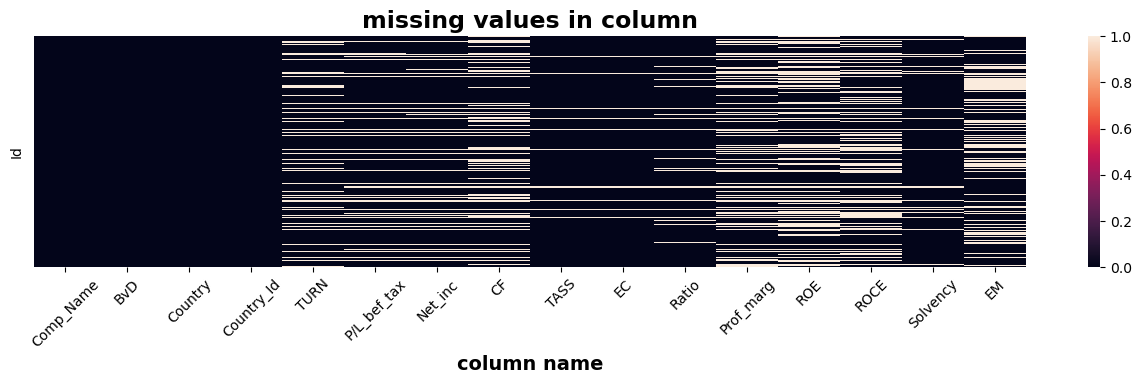

In [28]:
plt.figure(figsize=(16, 3))
sns.heatmap(df_econ.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column name", size=14, weight="bold")
plt.xticks(rotation=45)
plt.title("missing values in column",fontweight="bold",size=17)
plt.show()

#### Distribution of Economic Attributes data before transformation

In [29]:
# Two groups of company attributes can be distinguished, those relating to its size and to its performance
size = ['TURN', 'TASS', 'CF', 'EC', 'EM']
performance = ['P/L_bef_tax','Net_inc','Ratio','Prof_marg','ROE','ROCE','Solvency']

##### Formatting the numeric columns, those based on discrete numbers and those based on %ratios

In [30]:
# Numeric values are represented with a space separator for thousands, they need to be transformed back to numbers

for column in size:
    for value in enumerate(df_econ[column]):
        if type(value[1]) == float:
            df_econ[column].iloc[value[0]] = np.nan
        else:
            df_econ[column].iloc[value[0]] = int(value[1].replace(" ",""))
            
for column in performance:
    for value in enumerate(df_econ[column]):
        if type(value[1]) == float:
            df_econ[column].iloc[value[0]] = np.nan
        else:
            df_econ[column].iloc[value[0]] = float(value[1].replace(" ",""))

In [31]:
# Some companies have duplicated names, but since they have different BvD codes and come from different countries 
# they can be treated as separate entities

df_econ[df_econ.duplicated('Comp_Name', keep=False)]

Comp_Name             BvD      Country Country_Id  \
Id                                                                              
EASIN_103          AIRBUS HELICOPTERS     FR352383715       France         FR   
EASIN_104          AIRBUS HELICOPTERS    SE5020769336       Sweden         SE   
EASIN_486  FOKKER AEROSTRUCTURES B.V.      NL23088399  Netherlands         NL   
EASIN_487  FOKKER AEROSTRUCTURES B.V.  NL000018545637  Netherlands         NL   
EASIN_491        FOKKER SERVICES B.V.      NL20083483  Netherlands         NL   
EASIN_492        FOKKER SERVICES B.V.  NL000025490389  Netherlands         NL   

              TURN P/L_bef_tax   Net_inc      CF     TASS       EC Ratio  \
Id                                                                         
EASIN_103  4599490    615002.0  554974.0  716936  8119612  2307107  1.38   
EASIN_104     8276         NaN       NaN     NaN      NaN      NaN   NaN   
EASIN_486      NaN         NaN       NaN     NaN      NaN      NaN   NaN   
EASIN_487      NaN         NaN       NaN     NaN      NaN      NaN   NaN   
EASIN_491    96903      6587.0    6256.0     NaN   104846    73557  2.99   
EASIN_492      NaN         NaN       NaN     NaN      NaN      NaN   NaN   

          Prof_marg    ROE ROCE Solvency    EM  
Id                                              
EASIN_103     13.37  26.66  NaN    28.41  8354  
EASIN_104       NaN    NaN  NaN      NaN     0  
EASIN_486       NaN    NaN  NaN      NaN  1051  
EASIN_487       NaN    NaN  NaN      NaN   818  
EASIN_491       6.8   8.96  NaN    70.16   274  
EASIN_492       NaN    NaN  NaN      NaN   272

##### Distributions of size Economic Attributes with available data (A.D.)

In [32]:
# fig = plt.figure(figsize=(12, 7))
# fig.suptitle('Distributions of size Economic Attributes with available data (A.D.)', fontsize=16)
# # setting values to rows and column variables
# rows = 3
# columns = 2
# position = 1

# for column in size:
#     fig.add_subplot(rows, columns, position)
#     sns.histplot(df_econ[column].dropna(), kde=True, stat="percent")

#     if position in [1]:
#         scale = 0.004
#         plt.xlim([(-scale*(df_econ[column].max())), scale*(df_econ[column].max())])
    
#     elif position in [2]:
#         scale = 0.005
#         plt.xlim([(-scale*(df_econ[column].max())), scale*(df_econ[column].max())])
        
#     elif position in [3]:
#         scale = 0.005
#         plt.xlim([(-scale*(df_econ[column].max())), scale*(df_econ[column].max())])
    
#     elif position in [4]:
#         scale = 0.01
#         plt.xlim([(-scale*(df_econ[column].max())), scale*(df_econ[column].max())])   
        
#     elif position in [5]:
#         scale = 0.02
#         plt.xlim([(-scale*(df_econ[column].max())), scale*(df_econ[column].max())])        
        
#     plt.xticks(rotation='45')
#     plt.axvline(df_econ[column].mean(), color='magenta', linestyle='dashed', linewidth=2)
#     plt.axvline(df_econ[column].median(), color='cyan', linestyle='dashed', linewidth=2)
#     plt.legend(['Distribution','Mean','Median'])
#     plt.title(f"{column} (A.D.={round(df_econ.isna().sum()/len(df_econ)*(-100)+100,2)[column]}%)")
#     plt.grid()
    
#     position+=1
    
# fig.tight_layout()

##### Distributions of performance Economic Attributes with available data (A.D.)

In [33]:
# fig = plt.figure(figsize=(12, 10))
# fig.suptitle('Distributions of performance Economic Attributes with available data (A.D.)', fontsize=16)
# # setting values to rows and column variables
# rows = 4
# columns = 2
# position = 1  

# for column in performance:
#     fig.add_subplot(rows, columns, position)
#     sns.histplot(df_econ[column].dropna(), kde=True, stat="percent")
    
#     if position in [1,2]:
#         scale=0.01
#         plt.xlim([(-scale*(df_econ[column].max())), scale*(df_econ[column].max())])
        
#     elif position in [3]:
#         scale=0.25
#         plt.xlim([(-scale*0.1*(df_econ[column].max())), scale*(df_econ[column].max())])
        
#     elif position in [4]:
#         scale=0.5
#         plt.xlim([(-scale*(df_econ[column].max())), scale*(df_econ[column].max())])
        
#     elif position in [5]:
#         scale=0.5
#         plt.xlim([(-scale*(df_econ[column].max())), scale*(df_econ[column].max())])
        
#     elif position in [6]:
#         scale=0.25
#         plt.xlim([(-scale*(df_econ[column].max())), scale*(df_econ[column].max())])
        
#     elif position in [7]:
#         scale=1
#         plt.xlim([(-scale*0.1*(df_econ[column].max())), scale*(df_econ[column].max())])

#     plt.xticks(rotation='45')
#     plt.axvline(df_econ[column].mean(), color='magenta', linestyle='dashed', linewidth=2)
#     plt.axvline(df_econ[column].median(), color='cyan', linestyle='dashed', linewidth=2)
#     plt.legend(['Distribution','Mean','Median'])
#     plt.title(f"{column} (A.D.={round(df_econ.isna().sum()/len(df_econ)*(-100)+100,2)[column]}%)")
#     plt.grid()
    
#     position+=1
    
# fig.tight_layout()

##### Distributions of medians of size Economic Attributes with available data (A.D.), per country

C:\Users\rmagn\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\rmagn\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\rmagn\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\rmagn\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\rmagn\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\rmagn\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=ke

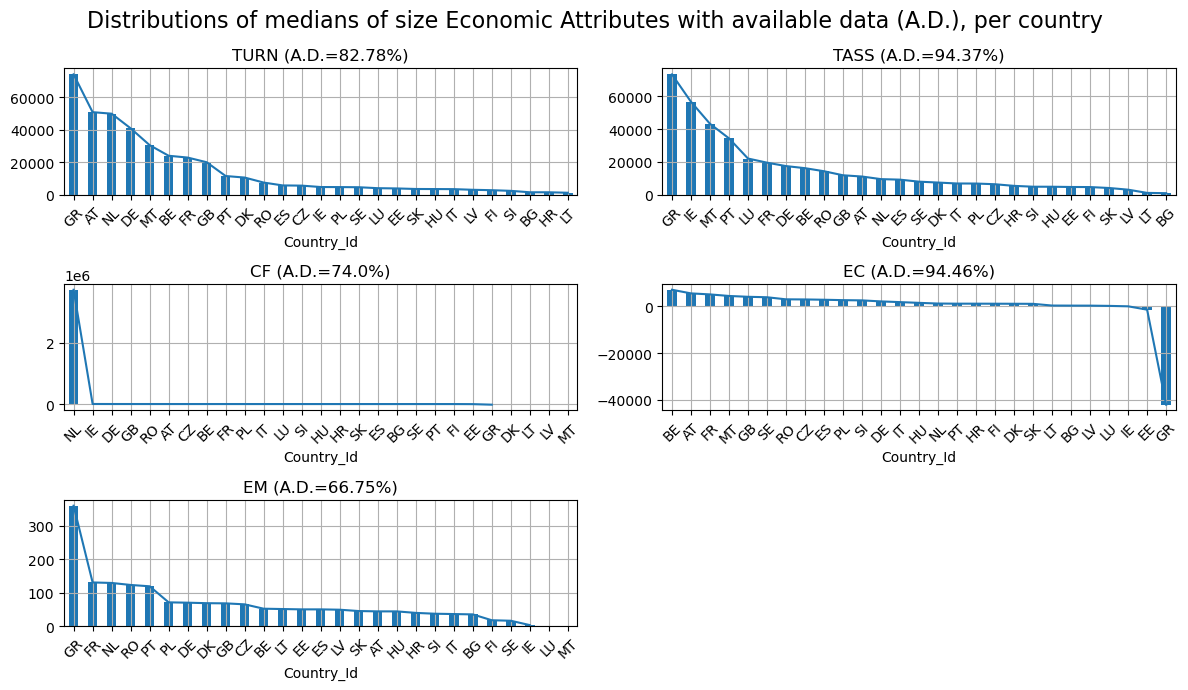

In [34]:
fig = plt.figure(figsize=(12, 7))
fig.suptitle('Distributions of medians of size Economic Attributes with available data (A.D.), per country', fontsize=16)
# setting values to rows and column variables
rows = 3
columns = 2
position = 1

for column in size:
    fig.add_subplot(rows, columns, position)
    
    names = df_econ.groupby(by=['Country_Id'])[column].median().sort_values(ascending=False)
    names.plot(kind='bar')
    
    plt.plot(df_econ.groupby(by=['Country_Id'])[column].median().sort_values(ascending=False))
    plt.xticks(rotation='45')
    plt.title(f"{column} (A.D.={round(df_econ.isna().sum()/len(df_econ)*(-100)+100,2)[column]}%)")
    plt.grid()
    
    position+=1

fig.tight_layout()

#### Preperation of the original frame (probably not important) 

In [35]:
#TODO potentially
# Considering the distributions median will be the most applicable measure for all attributes,
# because it differs significantly per country, it might be applied according to a per-country median.

### Features transformations

#### Transformation of Size columns

In [36]:
'''
(Look at point 2.2.3.2)

Although without the outlier values the 'cores' around medians may seem like a normal distribution, it is those largest
companies that mostly interlock, so it is important to keep their significantly larger size into account.
Since all of the size parameters have skewed, heavy-tail scale-free distribution, which becomes visible when we consider
f.e. how far means are from medians and from the seemingly normal 'bells', it seems most optimal to use log transformation.
Since log transformation cannot work with 0's, and negative numbers are a bad representation of size, 
it seems reasonable to change them to 0. 
'''

for column in size:
    df_econ[column].fillna(df_econ[column].median(), inplace=True)
    df_econ[column] = np.where((df_econ[column] < 0), 0, df_econ[column])
    df_econ[column] = np.log10(df_econ[column] + 1) 

#### Transformation of Performance columns

In [37]:
'''
(Look at point 2.2.3.3)
Distributions of performance attributes seem much more 'normal' so it seems viable to use the Standard Scaler. 
Although some of the parameters are already in % format, they may differ between each other, so scaling them is supposed to 
reduce those differences.
'''
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for column in performance:
    df_econ[column].fillna(df_econ[column].median(), inplace=True)
    df_econ[column] = scaler.fit_transform(df_econ[[column]])

#### Features correlation

It seems that features are reasonably independent. Strongly correlated are P/L before tax and net_income, which indeed represent almost the same value, just that the former is reduced by a fixed share of tax respectively to the original value.

Size attributes do correlate with each other ('TURN', 'TASS', 'EM'), which is understandable, because in high-tech industry it is hard to obtain one without the other. However, due to different types of manufacturers, some may rely more on one attribute than the other, and for that purpose they should be kept all together. 

There is only one cross-correlation between size and performance category of attributes - solvency and equity capital. Solvency represents a company's financial health, since it's one way of demonstrating its ability to manage its operations into the foreseeable future. Equity capital is the capital that a company gets from selling shares rather than borrowing money. It is an understandable correlation that has a meaningful reason to keep both - they seem to happen together, but don't necessarily have to.

<AxesSubplot:>

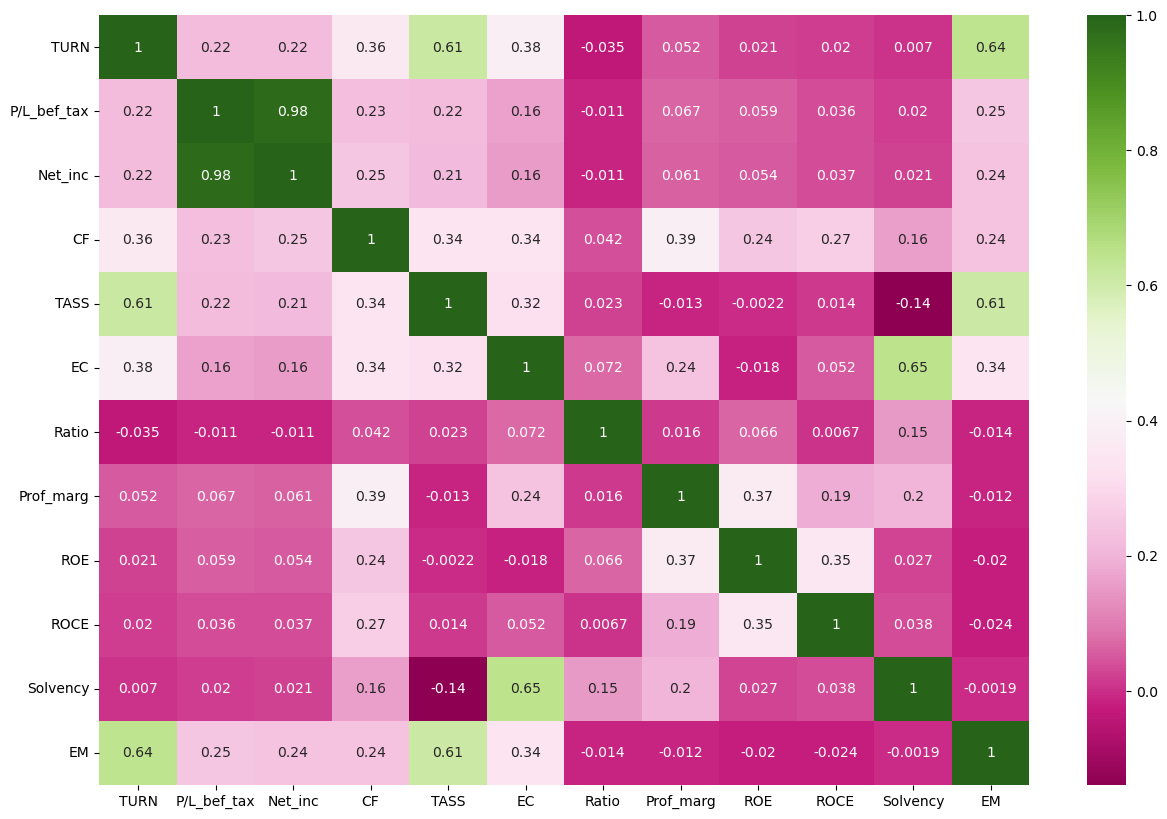

In [38]:
plt.figure(figsize=(15,10))
sns.heatmap(df_econ.corr(),cmap='PiYG',annot=True)

## Geolocation data

### Import and preparation

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
geod = pd.read_csv(r'Data\\Input\\EASIN-geoloc.csv', encoding="ISO-8859-1",index_col=[0])

geod.rename(columns={'Company name Latin alphabet': 'Comp_Name',
                      'BvD ID number': 'BvD',
                      'Country ISO code': 'Country_Code',
                      'Country': 'Country',
                      'City\nLatin Alphabet': 'City',
                      'Postcode\nLatin Alphabet': 'Postcode',
                      'Address line 1\nLatin Alphabet': 'Street'}, 
                    inplace=True)

# Reads codebook produced by EdgeList-generator
cdbk_di = dict([(index, bvd) for index, bvd in zip(cdbk['BvD'], cdbk.index)])

# Adds the Codes to the Dataframe
geod['Id'] = geod['BvD'].map(cdbk_di)
geod = geod.set_index('Id').sort_values(by=['Comp_Name'])

geod.head()

Comp_Name           BvD  \
Id                                                                         
EASIN_1                        2 EXCEL ENGINEERING LIMITED    GB08965471   
EASIN_2  450 AIRCRAFT LEASING MSN 60280 B787 DESIGNATED...      IE687948   
EASIN_3            4U AIRCRAFT DESIGN AND ENGINEERING GMBH  DE6070614944   
EASIN_4                               A & T AEROSPACE GMBH  DE2370336579   
EASIN_5                                              A C H   FR397730219   

        Country_Code         Country       City  Postcode  \
Id                                                          
EASIN_1           GB  United Kingdom     LONDON    W4 1DB   
EASIN_2           IE         Ireland     DUBLIN  V94 RX28   
EASIN_3           DE         Germany  FRANKFURT     60388   
EASIN_4           DE         Germany  NORDENHAM     26954   
EASIN_5           FR          France   POITIERS     86000   

                                   Street  \
Id                                          
EASIN_1                  72 FIELDING ROAD   
EASIN_2              32 MOLESWORTH STREET   
EASIN_3                    FLINSCHSTR. 55   
EASIN_4                 FLAGBALGER STR. 5   
EASIN_5  ZONE INDUSTRIELLE REPUBLIQUE III   

                                             NUTS1  \
Id                                                   
EASIN_1                               UKI - London   
EASIN_2                              IE0 - Ireland   
EASIN_3                               DE7 - Hessen   
EASIN_4                        DE9 - Niedersachsen   
EASIN_5  FRI - Aquitaine-Limousin-Poitou-Charentes   

                                             NUTS2                      NUTS3  
Id                                                                             
EASIN_1  UKI7 - Outer London - West and North West             UKI73 - Ealing  
EASIN_2                 IE06 - Eastern and Midland             IE061 - Dublin  
EASIN_3                           DE71 - Darmstadt  DE712 - Frankfurt am Main  
EASIN_4                           DE94 - Weser-Ems        DE94G - Wesermarsch  
EASIN_5                    FRI3 - Poitou-Charentes             FRI34 - Vienne

In [41]:
geod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1174 entries, EASIN_1 to EASIN_1173
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Comp_Name     1174 non-null   object
 1   BvD           1174 non-null   object
 2   Country_Code  1174 non-null   object
 3   Country       1174 non-null   object
 4   City          1110 non-null   object
 5   Postcode      1105 non-null   object
 6   Street        1162 non-null   object
 7   NUTS1         1051 non-null   object
 8   NUTS2         1047 non-null   object
 9   NUTS3         1041 non-null   object
dtypes: object(10)
memory usage: 100.9+ KB


In [42]:
# There is one more company in the geo dataset, which has to be removed
geo = geod['BvD'].unique()
econ = df_econ['BvD'].unique()
list(set(geo) - set(econ))

['CZ27683737']

In [43]:
geod.drop(geod[geod['BvD'] == 'CZ27683737'].index, inplace = True)
geod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1173 entries, EASIN_1 to EASIN_1173
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Comp_Name     1173 non-null   object
 1   BvD           1173 non-null   object
 2   Country_Code  1173 non-null   object
 3   Country       1173 non-null   object
 4   City          1109 non-null   object
 5   Postcode      1104 non-null   object
 6   Street        1161 non-null   object
 7   NUTS1         1050 non-null   object
 8   NUTS2         1046 non-null   object
 9   NUTS3         1040 non-null   object
dtypes: object(10)
memory usage: 100.8+ KB


### Geo data processing

#### Missing Data

##### Available data

In [44]:
round(geod.isna().sum()/len(geod)*(-100)+100,2).sort_values(ascending=False)

Comp_Name       100.00
BvD             100.00
Country_Code    100.00
Country         100.00
Street           98.98
City             94.54
Postcode         94.12
NUTS1            89.51
NUTS2            89.17
NUTS3            88.66
dtype: float64

##### Missing data

In [45]:
round(geod.isna().sum()/len(geod)*100,2).sort_values(ascending=False)

NUTS3           11.34
NUTS2           10.83
NUTS1           10.49
Postcode         5.88
City             5.46
Street           1.02
Comp_Name        0.00
BvD              0.00
Country_Code     0.00
Country          0.00
dtype: float64

##### Visualisation of missing data

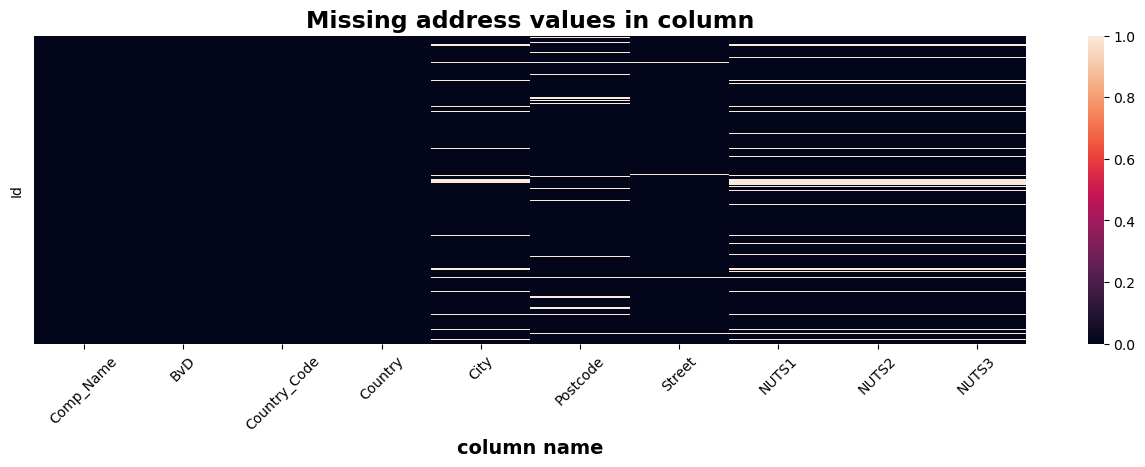

In [46]:
plt.figure(figsize=(16, 4))
sns.heatmap(geod.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column name", size=14, weight="bold")
plt.xticks(rotation=45)
plt.title("Missing address values in column",fontweight="bold",size=17)
plt.show()

#### Capitalizing city names

In [47]:
for city in enumerate(geod['City']): 
    if type(city[1]) == str:
        geod['City'].iloc[city[0]] = str(city[1]).capitalize()

#### Filling up column 'Cities' 

Since this project uses a free geolocation API it is quite basic, the check will be limited only to cities and countries
However, considering the scale of the study (entire Europe) and nature of inter-company relations (board interlocks) 
this approximation is sufficient. 

##### Retrieval from NUTS3

In [48]:
geod[(geod['City'].isna()) & (~geod['NUTS3'].isna())]

Comp_Name           BvD Country_Code Country City  \
Id                                                                      
EASIN_104  AIRBUS HELICOPTERS  SE5020769336           SE  Sweden  NaN   

          Postcode Street              NUTS1             NUTS2  \
Id                                                               
EASIN_104      NaN    NaN  SE1 - East Sweden  SE11 - Stockholm   

                       NUTS3  
Id                            
EASIN_104  SE110 - Stockholm

In [49]:
# for each city that doesn't have input check if NUTS3 is not empty, if there is some information in NUTS3 - 
# extract the second part, use it to fill the cities data

for city in enumerate(geod['City']):
    if (type(city[1]) == float) & (type(geod['NUTS3'].iloc[city[0]]) != float):
         geod['City'].iloc[city[0]] = geod['NUTS3'].iloc[city[0]].split('- ')[1]

In [50]:
geod[['City','NUTS3']].loc['EASIN_104']

City             Stockholm
NUTS3    SE110 - Stockholm
Name: EASIN_104, dtype: object

##### Using Postcode

In [51]:
geod[geod['City'].isna()]['Postcode'].unique()

array([nan, 'V14 T446', 'V14 AN29', 'K67 PP52', 'D01 YE64', 'V94 RX28',
       'A94 T3K2', 'V14 EV57', 'H91 YF8R', 'T12 NY99', 'D02 PR89',
       'P31 HW35', 'D04 W7K5', 'A96 A8D5', 'A98 W2H9', 'V94 AT85',
       'V94 4D83', 'E25 WK15'], dtype=object)

In [52]:
# Dictionary for keys = Post Code, values = cities 

# For Irish cities - since Postcodes are very similar it is convenient to do them country by country
pstcds = {}
pstcds['V14 AN29'] = 'Shannon'
pstcds['V14 T446'] = 'Shannon'
pstcds['D01 YE64'] = 'Dublin'
pstcds['V94 4D83'] = 'Limerick'
pstcds['V14 EV57'] = 'Shannon'
pstcds['A98 W2H9'] = 'Bray'
pstcds['T12 NY99'] = 'Cork'
pstcds['A96 A8D5'] = 'Dublin'
pstcds['P31 HW35'] = 'Ballincollig'
pstcds['D02 PR89'] = 'Dublin'
pstcds['V94 RX28'] = 'Illaunyregan'
pstcds['D04 W7K5'] = 'Dublin'
pstcds['E25 WK15'] = "Ashwell's-Lot"
pstcds['A94 T3K2'] = 'Dublin'
pstcds['K67 PP52'] = 'Swords'
pstcds['H91 YF8R'] = 'Galway'
pstcds['V94 AT85'] = 'Limerick'

In [53]:
# Start with Irish companies, each company which doesn't have a city - if it has postcode extract City from dictionary,
# based on postcode in that dictionary.

for city in enumerate(geod['City']):
    if (type(city[1]) == float) & (geod['Postcode'].iloc[city[0]] in pstcds.keys()):
        geod['City'].iloc[city[0]] = pstcds[str(geod['Postcode'].iloc[city[0]])]

##### Using Street

In [54]:
geod[(geod['Country']=='Ireland') & (geod['City'].isna())]
# 3 companies don't have neither city nor postcode

Comp_Name       BvD  \
Id                                                                     
EASIN_883   RENISHAW (IRELAND) DESIGNATED ACTIVITY COMPANY  IE081426   
EASIN_905                              ROTO SPIRAL LIMITED  IE068252   
EASIN_1063                        TEAM ACCESSORIES LIMITED  IE224313   

           Country_Code  Country City Postcode                Street NUTS1  \
Id                                                                           
EASIN_883            IE  Ireland  NaN      NaN  SWORDS BUSINESS PARK   NaN   
EASIN_905            IE  Ireland  NaN      NaN            EARLSGROVE   NaN   
EASIN_1063           IE  Ireland  NaN      NaN       RIDGEWELL HOUSE   NaN   

           NUTS2 NUTS3  
Id                      
EASIN_883    NaN   NaN  
EASIN_905    NaN   NaN  
EASIN_1063   NaN   NaN

In [55]:
streets = {}
streets['SWORDS BUSINESS PARK'] = 'Sword'
streets['EARLSGROVE'] = 'Thomastown'
streets['RIDGEWELL HOUSE'] = 'Rathgreat'

In [56]:
for city in enumerate(geod['City'].isna()):
    if geod['Street'].iloc[city[0]] in streets.keys():
         geod['City'].iloc[city[0]] = streets[geod['Street'].iloc[city[0]]]

##### Assigning capital for companies with only country information

In [57]:
len(geod[(geod['City'].isna()) & (geod['Postcode'].isna()) & (geod['Street'].isna())])

7

In [58]:
geod[(geod['City'].isna()) & (geod['Postcode'].isna()) & (geod['Street'].isna())]['Country'].unique()

array(['Austria', 'Germany', 'France', 'Sweden'], dtype=object)

In [59]:
capitals = {}
capitals['Germany'] = 'Berlin'
capitals['Sweden'] = 'Stockholm'
capitals['France'] = 'Paris'
capitals['Austria'] = 'Vienna'

In [60]:
for city in enumerate(geod['City']):
    if (type(city[1]) == float) & (geod['Country'].iloc[city[0]] in capitals.keys()):
         geod['City'].iloc[city[0]] = capitals[geod['Country'].iloc[city[0]]]

In [61]:
# Final check of missing cities
geod['City'].isna().sum()

0

#### Transforming cities with additional numbers in the name (representing districts)

In [62]:
for city in enumerate(geod['City']):
    if any(i.isdigit() for i in city[1]):
        geod['City'].iloc[city[0]] = city[1].split(' ')[0]

In [63]:
for city in enumerate(geod['City']):
    if len(city[1].split(' ')) > 1 :
        print(city)

(10, 'Neusiedl am see')
(11, 'Akers styckeb')
(12, 'Arganda del rey')
(13, 'Miranda de ebro')
(14, 'Miranda de ebro')
(15, 'Alcala de guadaira')
(20, 'Sankt augustin')
(21, 'Serres castet')
(23, 'Ronchi dei legionari')
(30, 'Soisy sur seine')
(43, 'Venegono superiore')
(48, 'La rinconada')
(57, 'Dos hermanas')
(68, 'St jean d illac')
(71, 'Puerto real')
(74, 'Abanto y ciervana/abanto zierbena')
(78, 'Lonate pozzolo')
(81, 'Venaria reale')
(82, 'La rinconada')
(89, 'Braunau am inn - ranshofen')
(96, 'Santa cristina couto')
(107, 'Oras ghimbav')
(120, 'La rinconada')
(122, 'La rinconada')
(123, 'El puerto de santa maria')
(125, 'Begunje na gorenjskem')
(128, 'La rinconada')
(130, 'Marano di napoli')
(131, 'San quirino')
(132, 'Le loroux bottereau')
(144, 'Villeneuve la garenne')
(145, 'Villeneuve la garenne')
(146, 'Les mureaux')
(147, 'Oras otopeni')
(177, 'Libice nad cidlinou')
(183, 'Wiener neustadt')
(209, 'San vitaliano')
(315, 'Letchworth garden city')
(316, 'Vila nova de gaia')
(3

#### Less popular cities, that were not found initially, are changed into closest largest ones

In [64]:
for city in enumerate(geod['City']):
    if city[1] == 'Illaunyregan':
        geod['City'].iloc[city[0]] = 'Limerick'    
        
    elif city[1] == 'Rathgreat':
        geod['City'].iloc[city[0]] = 'Balbriggan'
        
    elif city[1] == 'Oras ghimbav':
        geod['City'].iloc[city[0]] = 'Brasov'
        
    elif city[1] == 'Loc. borgo carso latina':
        geod['City'].iloc[city[0]] = 'Latina'
        
    elif city[1] == 'Marupes nov.':
        geod['City'].iloc[city[0]] = 'Ryga'
        
    elif city[1] == 'Oras otopeni':
        geod['City'].iloc[city[0]] = 'Bucarest'
        
    elif city[1] == 'Vazatkiemio k.':
        geod['City'].iloc[city[0]] = 'Kowno'
        
    elif city[1] == 'Utlandet':
        geod['City'].iloc[city[0]] = 'Stockholm'
    
    elif city[1] == 'Akers styckeb':
        geod['City'].iloc[city[0]] = 'Forsa'
    
    elif city[1] == 'Meudon-la-foret cedex':
        geod['City'].iloc[city[0]] = 'Paris'

#### Some company next to Madagascar, it is still french - will be allocated to Paris

In [65]:
geod[geod['BvD'] =='FR797914454']

Comp_Name          BvD Country_Code           Country     City  \
Id                                                                         
EASIN_480     FLY-R  FR797914454           FR  Reunion (France)  St paul   

          Postcode               Street                       NUTS1  \
Id                                                                    
EASIN_480    97460  BASE ULM DE CAMBAIE  FRY - Outlying territories   

                    NUTS2            NUTS3  
Id                                          
EASIN_480  FRY4 - Reunion  FRY40 - Reunion

In [66]:
geod['Country'].loc['EASIN_480'] = 'France'
geod['City'].loc['EASIN_480'] = 'Paris'

In [67]:
geod.loc['EASIN_480']

Comp_Name                            FLY-R
BvD                            FR797914454
Country_Code                            FR
Country                             France
City                                 Paris
Postcode                             97460
Street                 BASE ULM DE CAMBAIE
NUTS1           FRY - Outlying territories
NUTS2                       FRY4 - Reunion
NUTS3                      FRY40 - Reunion
Name: EASIN_480, dtype: object

#### Combining City and Country into one address

In [68]:
geod['ADDRESS'] = geod['City'].astype(str) + ',' + \
                geod['Country']

### Finding geolocations of companies

In [69]:
# Commented to avoid running at each reload

In [70]:
# import geopy
# from geopy.geocoders import Nominatim
# from geopy.extra.rate_limiter import RateLimiter
# from tqdm import tqdm
# tqdm.pandas()
# pd.options.mode.chained_assignment = None  # default='warn'

# locator = Nominatim(user_agent="myGeocoder")
# geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
# geod['location'] = geod['ADDRESS'].progress_apply(geocode)
# geod['point'] = geod['location'].apply(lambda loc: tuple(loc.point) if loc else None)

#### Check if all the data has been found properly

In [71]:
# geod[geod['point'].isna()][['City', 'Country']]

#### Creating separate lat/lon columns

In [72]:
# geod['latitude'] = geod['point'].apply(lambda x: str(x).split()[0].replace("(","").replace(",",""))
# geod['longitude'] = geod['point'].apply(lambda x: str(x).split()[1].replace(",",""))

#### Export to .csv (to avoid geolocating at each attempt)

In [73]:
# geod.to_csv("Data/EASIN Geo-with points.csv")

In [74]:
import pandas as pd
geod2 = pd.read_csv(r'Data\\EASIN Geo-with points.csv', encoding="ISO-8859-1",index_col=[0])

# Reads codebook produced by EdgeList-generator
cdbk_di = dict([(index, bvd) for index, bvd in zip(cdbk['BvD'], cdbk.index)])
# Adds the Codes to the Dataframe
geod2['Id'] = geod2['BvD'].map(cdbk_di)
geod2 = geod2.set_index('Id').sort_values(by=['Comp_Name'])

geod2.head()

Comp_Name           BvD  \
Id                                                                         
EASIN_1                        2 EXCEL ENGINEERING LIMITED    GB08965471   
EASIN_2  450 AIRCRAFT LEASING MSN 60280 B787 DESIGNATED...      IE687948   
EASIN_3            4U AIRCRAFT DESIGN AND ENGINEERING GMBH  DE6070614944   
EASIN_4                               A & T AEROSPACE GMBH  DE2370336579   
EASIN_5                                              A C H   FR397730219   

        Country_Code         Country       City  Postcode  \
Id                                                          
EASIN_1           GB  United Kingdom     London    W4 1DB   
EASIN_2           IE         Ireland     Dublin  V94 RX28   
EASIN_3           DE         Germany  Frankfurt     60388   
EASIN_4           DE         Germany  Nordenham     26954   
EASIN_5           FR          France   Poitiers     86000   

                                   Street  \
Id                                          
EASIN_1                  72 FIELDING ROAD   
EASIN_2              32 MOLESWORTH STREET   
EASIN_3                    FLINSCHSTR. 55   
EASIN_4                 FLAGBALGER STR. 5   
EASIN_5  ZONE INDUSTRIELLE REPUBLIQUE III   

                                             NUTS1  \
Id                                                   
EASIN_1                               UKI - London   
EASIN_2                              IE0 - Ireland   
EASIN_3                               DE7 - Hessen   
EASIN_4                        DE9 - Niedersachsen   
EASIN_5  FRI - Aquitaine-Limousin-Poitou-Charentes   

                                             NUTS2                      NUTS3  \
Id                                                                              
EASIN_1  UKI7 - Outer London - West and North West             UKI73 - Ealing   
EASIN_2                 IE06 - Eastern and Midland             IE061 - Dublin   
EASIN_3                           DE71 - Darmstadt  DE712 - Frankfurt am Main   
EASIN_4                           DE94 - Weser-Ems        DE94G - Wesermarsch   
EASIN_5                    FRI3 - Poitou-Charentes             FRI34 - Vienne   

                       ADDRESS  \
Id                               
EASIN_1  London,United Kingdom   
EASIN_2         Dublin,Ireland   
EASIN_3      Frankfurt,Germany   
EASIN_4      Nordenham,Germany   
EASIN_5        Poitiers,France   

                                                  location  \
Id                                                           
EASIN_1    London, Greater London, England, United Kingdom   
EASIN_2        Dublin, Dublin 1, Leinster, Ãire / Ireland   
EASIN_3             Frankfurt am Main, Hessen, Deutschland   
EASIN_4  Nordenham, Landkreis Wesermarsch, Niedersachse...   
EASIN_5  Poitiers, Vienne, Nouvelle-Aquitaine, France m...   

                                 point   latitude  longitude  
Id                                                            
EASIN_1  (51.5073219, -0.1276474, 0.0)  51.507322  -0.127647  
EASIN_2  (53.3498006, -6.2602964, 0.0)  53.349801  -6.260296  
EASIN_3   (50.1106444, 8.6820917, 0.0)  50.110644   8.682092  
EASIN_4   (53.4973636, 8.4820227, 0.0)  53.497364   8.482023  
EASIN_5    (46.5802596, 0.340196, 0.0)  46.580260   0.340196

In [75]:
geod2.drop(geod2[geod2['BvD'] == 'CZ27683737'].index, inplace = True)
geod2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1173 entries, EASIN_1 to EASIN_1173
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Comp_Name     1173 non-null   object 
 1   BvD           1173 non-null   object 
 2   Country_Code  1173 non-null   object 
 3   Country       1173 non-null   object 
 4   City          1173 non-null   object 
 5   Postcode      1104 non-null   object 
 6   Street        1161 non-null   object 
 7   NUTS1         1050 non-null   object 
 8   NUTS2         1046 non-null   object 
 9   NUTS3         1040 non-null   object 
 10  ADDRESS       1173 non-null   object 
 11  location      1173 non-null   object 
 12  point         1173 non-null   object 
 13  latitude      1173 non-null   float64
 14  longitude     1173 non-null   float64
dtypes: float64(2), object(13)
memory usage: 146.6+ KB


#### Clustering companies with DBSCAN

###### EU Clusters definition : https://single-market-economy.ec.europa.eu/industry/strategy/cluster-policy_en
###### Actual EU Clusters: https://www.eacp-aero.eu/about-eacp/member-chart.html

In [76]:
import plotly.express as px
from sklearn.cluster import DBSCAN
import math

In [77]:
from math import sin, cos, sqrt, atan2, radians
def get_geo_distance(x, y): # x, y - two points
    lat1, lon1 = x
    lat2, lon2 = y
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

In [78]:
distance = 35 # distance between companies to include them in a cluster (in KM)
min_clus_size = 5 # minimum number of closeby companies to consider them a cluster

In [79]:
dbs = DBSCAN(eps=distance, metric=get_geo_distance, min_samples=min_clus_size)
labels = dbs.fit_predict(geod2[['latitude', 'longitude']])
geod2['label'] = labels
    
geod2['Size'] = geod2['label'].apply(lambda x: 1 if x == -1 else len(geod2.groupby('label').agg({'BvD': pd.Series.unique})['BvD'][x]))
  
fig = px.scatter_mapbox(geod2, lat="latitude", lon="longitude", 
                        color=labels, 
                        hover_name="City",
                        size='Size',
                        zoom=2.4,
                        size_max = 20
                       )

fig.update_layout(mapbox_style="open-street-map")
fig.update_geos(scope='europe')

fig.show()

###### Original clusters

Clusters will not be exactly replicated, because the actual clusters gather organisations of different types, such as industry, universities, public local/national institutions, etc. 

In case of this project, there are gatherings of only industry companies, and so do not represent industrial clusters strictu sensu. Nonetheless, majority of actual clusters were correctly recognised.

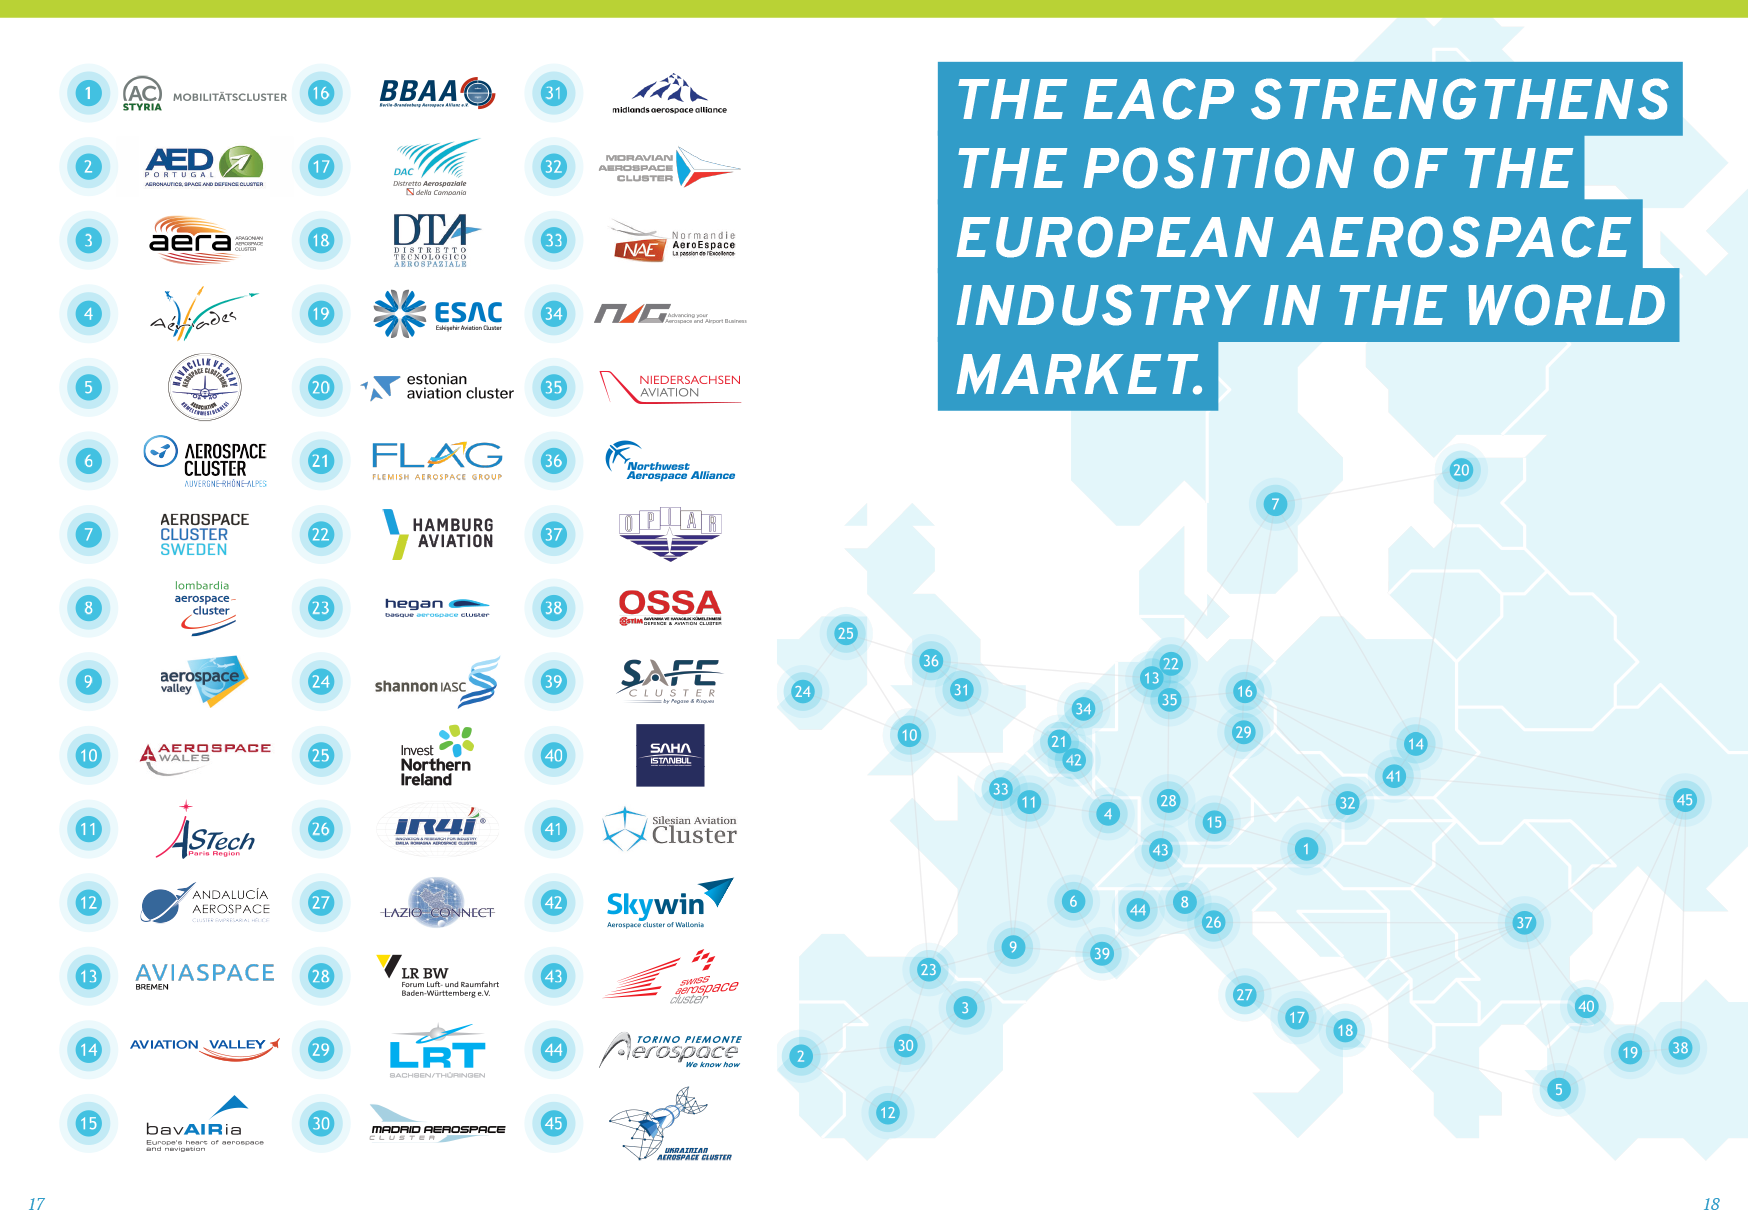

In [80]:
# Clusters in terms of cities and companies
# label -1 symbolises non-clustered companies

ind_clusters = geod2.groupby('label').agg({'City': pd.Series.unique, 'BvD': pd.Series.unique})
print(f"Number of clusters: {len(ind_clusters)-1}")
ind_clusters

Number of clusters: 40


City  \
label                                                      
-1     [Frankfurt, Nordenham, Poitiers, Neusiedl am s...   
 0     [London, Henfield, Northampton, Guildford, Yeo...   
 1                    [Dublin, Swords, Bray, Balbriggan]   
 2     [Nola, Napoli, Acerra, Marano di napoli, San v...   
 3                      [Bucuresti, Bucarest, Bucharest]   
 4     [Arganda del rey, Getafe, Illescas, Madrid, To...   
 5     [Miranda de ebro, Berantevilla, Vitoria-gastei...   
 6     [Alcala de guadaira, La rinconada, Dos hermana...   
 7     [Westknollendam, Leiden, Schiphol, Nieuw-venne...   
 8     [Ronchi dei legionari, Trieste, Ajdovscina, Mo...   
 9     [Birmingham, Wednesbury, Solihull, Coventry, B...   
 10                                    [Brasov, Ghimbav]   
 11                                          [Leicester]   
 12    [Soisy sur seine, Paris, Valenton, Villeneuve ...   
 13                                  [Shannon, Limerick]   
 14    [Turate, Venegono superiore, Colverde, Lonate ...   
 15    [Sauveniere, Hoboken, Zaventem, Bruxelles, Niv...   
 16    [Ropczyce, Rzeszow, Mielec, Nowa deba, Tajecin...   
 17    [Stockport, Runcorn, Manchester, Prescot, Bolt...   
 18       [Cadiz, Puerto real, El puerto de santa maria]   
 19    [St jean d illac, St medard en jalles, Merigna...   
 20    [Venaria reale, Pinerolo, Collegno, Torino, Ri...   
 21                            [Stockholm, Solna, Kista]   
 22                          [Hamburg, Buxtehude, Stade]   
 23       [Roma, Ciampino, Monterotondo, Albano laziale]   
 24                          [Parma, Sant'ilario d'enza]   
 25    [Blagnac, Toulouse, Cugnaux, Cornebarrieu, Ayg...   
 26                        [Warszawa, Piaseczno, Blonie]   
 27    [Czechowice-dziedzice, Bielsko-biala, Kozy, My...   
 28                                [Praha, Odolena voda]   
 29    [Berlin, Schoenefeld, Blankenfelde-mahlow, Str...   
 30    [Muenchen, Ottobrunn, Wessling, Taufkirchen, U...   
 31    [Uhldingen-muehlhofen, Hohentengen, Friedrichs...   
 32    [Hasselt, Wassenberg, Hermalle-sous-argenteau,...   
 33                            [Latina, Sabaudia, Sezze]   
 34                                              [Derby]   
 35                                 [Cork, Ballincollig]   
 36                                             [Kalisz]   
 37                        [Paty, Budapest, Veresegyhaz]   
 38                          [Ashwell's-Lot, Thomastown]   
 39       [Duesseldorf, Huenxe, Kaarst, Neuss, Muelheim]   

                                                     BvD  
label                                                     
-1     [DE6070614944, DE2370336579, FR397730219, AT91...  
 0     [GB08965471, GBML3112650, GB05859680, GB044623...  
 1     [IE687948, IE611653, IE586457, IE493228, IE614...  
 2     [IT00333460632, IT05159211217, IT06131200633, ...  
 3     [RO16285265, RO33519692, RO13130789, RO3603091...  
 4     [ESB79987608, ESB88284211, ESA45699998, ESA457...  
 5     [ESB09557927, ESB83195933, ESA01142207, ESA012...  
 6     [ESA41743154, ESA91067918, ESB91320572, ESA414...  
 7     [NL28054763, NL28086907, NL24288945, NL3419881...  
 8     [IT00416010312, IT01212700320, SI2352931, IT00...  
 9     [GB03286967, GBML4117221, GB12039718, GB003559...  
 10    [RO25658690, RO14403216, RO1132930, RO25932794...  
 11    [GB00620201, GB00474681, GB13071140, GB0651950...  
 12    [FR807453972, FR572094514, FR403071988, FR5721...  
 13    [IE051950, IE657171, IE661078, IE661079, IE661...  
 14    [IT09951990150, IT05898080154, IT03630610131, ...  
 15    [BE0436888691, BE0462814714, BE0441428489, BE0...  
 16    [PL361860421, PL691749040, PL831214781, PL1809...  
 17    [GB08337076, GB01972451, GB11879314, GB0100427...  
 18    [ESB86526803, ESB11784485, ESA72309149, ESB115...  
 19    [FR823171798, FR318457447, FR530264969, FR3195...  
 20    [IT10800310012, IT07481480015, IT10198380015, ...  
 21    [SE5590532775, SE5020769336, SE5566027446, SE5..

## Final dataset

### Merged Economic and Geographic attributes

In [81]:
df_attributes = pd.merge(df_econ, geod2, left_index=True, right_index=True)

In [82]:
df_attributes.columns

Index(['Comp_Name_x', 'BvD_x', 'Country_x', 'Country_Id', 'TURN',
       'P/L_bef_tax', 'Net_inc', 'CF', 'TASS', 'EC', 'Ratio', 'Prof_marg',
       'ROE', 'ROCE', 'Solvency', 'EM', 'Comp_Name_y', 'BvD_y', 'Country_Code',
       'Country_y', 'City', 'Postcode', 'Street', 'NUTS1', 'NUTS2', 'NUTS3',
       'ADDRESS', 'location', 'point', 'latitude', 'longitude', 'label',
       'Size'],
      dtype='object')

In [83]:
df_attributes = df_attributes[['Comp_Name_x','Country_Id', 'TURN', 'P/L_bef_tax', 'Net_inc', 'CF', 'TASS', 'EC', 'Ratio', 'Prof_marg',
       'ROE', 'ROCE', 'Solvency', 'EM', 'point', 'label']]
df_attributes.rename(columns={'Comp_Name_x':'Name', 'label': 'Cluster'}, inplace=True)
df_attributes.head()

Name Country_Id  \
Id                                                                      
EASIN_1                        2 EXCEL ENGINEERING LIMITED         GB   
EASIN_2  450 AIRCRAFT LEASING MSN 60280 B787 DESIGNATED...         IE   
EASIN_3            4U AIRCRAFT DESIGN AND ENGINEERING GMBH         DE   
EASIN_4                               A & T AEROSPACE GMBH         DE   
EASIN_5                                              A C H         FR   

             TURN  P/L_bef_tax   Net_inc        CF      TASS        EC  \
Id                                                                       
EASIN_1  4.305072    -0.055384 -0.051941  2.791691  3.901731  0.000000   
EASIN_2  3.947532    -0.060281 -0.057722  2.780677  5.146770  0.000000   
EASIN_3  3.854792    -0.055698 -0.052283  2.780677  4.353358  3.327767   
EASIN_4  3.854792    -0.048949 -0.046954  2.998259  4.282826  3.249198   
EASIN_5  3.854792    -0.055698 -0.052283  2.780677  3.807941  3.472610   

            Ratio  Prof_marg       ROE      ROCE  Solvency        EM  \
Id                                                                     
EASIN_1 -0.219289   0.061481  0.070995  0.045052 -3.107540  2.285557   
EASIN_2 -0.369588  -0.438569  0.070995  0.025280 -0.816840  1.755875   
EASIN_3 -0.224705   0.110331  0.070995  0.039527 -0.111246  1.230449   
EASIN_4  0.078600   0.110331  0.912587  0.195525 -0.518054  0.602060   
EASIN_5  0.012252   0.110331  0.070995  0.039527  0.593446  1.531479   

                                 point  Cluster  
Id                                               
EASIN_1  (51.5073219, -0.1276474, 0.0)        0  
EASIN_2  (53.3498006, -6.2602964, 0.0)        1  
EASIN_3   (50.1106444, 8.6820917, 0.0)       -1  
EASIN_4   (53.4973636, 8.4820227, 0.0)       -1  
EASIN_5    (46.5802596, 0.340196, 0.0)       -1

In [84]:
df_attributes[df_attributes.index == 'EASIN_277']

Name Country_Id      TURN  P/L_bef_tax    Net_inc  \
Id                                                                        
EASIN_277  BAE SYSTEMS PLC         GB  7.428736    13.201483  12.989189   

                 CF      TASS        EC     Ratio  Prof_marg       ROE  \
Id                                                                       
EASIN_277  6.522307  7.561735  7.012887 -0.280221    0.51046  0.304902   

               ROCE  Solvency        EM                          point  \
Id                                                                       
EASIN_277  0.178951  0.053944  4.913819  (51.5073219, -0.1276474, 0.0)   

           Cluster  
Id                  
EASIN_277        0

In [85]:
df_attributes[df_attributes.index == 'EASIN_276']

Name Country_Id      TURN  P/L_bef_tax  \
Id                                                                              
EASIN_276  BAE SYSTEMS (OPERATIONS) LIMITED         GB  6.926994     2.262651   

            Net_inc       CF      TASS        EC     Ratio  Prof_marg  \
Id                                                                      
EASIN_276  2.299211  5.73993  7.127292  6.542008 -0.364172    0.30218   

                ROE      ROCE  Solvency        EM  \
Id                                                  
EASIN_276  0.158304  0.123705 -0.014358  4.183498   

                                   point  Cluster  
Id                                                 
EASIN_276  (51.2918693, -0.7539836, 0.0)        0

### Network + All attributes

In [86]:
import copy
df = copy.copy(all_edges_BINT).reset_index(drop=True)
df.head()

source     target  weight
0  EASIN_276  EASIN_277      12
1  EASIN_112   EASIN_95      12
2  EASIN_277  EASIN_276      12
3   EASIN_95  EASIN_112      12
4  EASIN_103   EASIN_95      11

#### Matching 'source' and 'target' with their attributes

In [87]:
df = pd.merge(df, df_attributes, left_on=df['source'], right_index=True, how='left')
df = pd.merge(df, df_attributes, left_on=df['target'], right_index=True, how='left')
df.insert(0,'couple','')
df['couple'] = df['source'].astype(str) + ":" + df['target'].astype(str)
df.drop(['source', 'target'], axis=1, inplace=True)

In [88]:
df.head()

couple  weight                            Name_x Country_Id_x  \
0  EASIN_276:EASIN_277      12  BAE SYSTEMS (OPERATIONS) LIMITED           GB   
1   EASIN_112:EASIN_95      12                 AIRBUS OPERATIONS           FR   
2  EASIN_277:EASIN_276      12                   BAE SYSTEMS PLC           GB   
3   EASIN_95:EASIN_112      12                            AIRBUS           FR   
4   EASIN_103:EASIN_95      11                AIRBUS HELICOPTERS           FR   

     TURN_x  P/L_bef_tax_x  Net_inc_x      CF_x    TASS_x      EC_x  ...  \
0  6.926994       2.262651   2.299211  5.739930  7.127292  6.542008  ...   
1  7.050982       5.315522   5.169968  6.293877  7.206579  7.024284  ...   
2  7.428736      13.201483  12.989189  6.522307  7.561735  7.012887  ...   
3  7.667481       4.320192   7.160447  6.161412  7.827635  7.042794  ...   
4  6.662710       2.820556   3.012208  5.855481  6.909535  6.363068  ...   

     TASS_y      EC_y   Ratio_y  Prof_marg_y     ROE_y    ROCE_y Solvency_y  \
0  7.561735  7.012887 -0.280221     0.510460  0.304902  0.178951   0.053944   
1  7.827635  7.042794 -0.108258     0.130759  0.094877  0.014957  -0.302614   
2  7.127292  6.542008 -0.364172     0.302180  0.158304  0.123705  -0.014358   
3  7.206579  7.024284 -0.194916     0.494917  0.121130  0.122687   1.181090   
4  7.827635  7.042794 -0.108258     0.130759  0.094877  0.014957  -0.302614   

       EM_y                        point_y Cluster_y  
0  4.913819  (51.5073219, -0.1276474, 0.0)         0  
1  3.951580        (43.6434, 1.37799, 0.0)        25  
2  4.183498  (51.2918693, -0.7539836, 0.0)         0  
3  4.306575   (43.6044622, 1.4442469, 0.0)        25  
4  3.951580        (43.6434, 1.37799, 0.0)        25  

[5 rows x 34 columns]

#### Dyadic feature - Same first word (showing if companies belong to the same business group - Airbus, Safran, BAE, etc.)

In [89]:
df.columns

Index(['couple', 'weight', 'Name_x', 'Country_Id_x', 'TURN_x', 'P/L_bef_tax_x',
       'Net_inc_x', 'CF_x', 'TASS_x', 'EC_x', 'Ratio_x', 'Prof_marg_x',
       'ROE_x', 'ROCE_x', 'Solvency_x', 'EM_x', 'point_x', 'Cluster_x',
       'Name_y', 'Country_Id_y', 'TURN_y', 'P/L_bef_tax_y', 'Net_inc_y',
       'CF_y', 'TASS_y', 'EC_y', 'Ratio_y', 'Prof_marg_y', 'ROE_y', 'ROCE_y',
       'Solvency_y', 'EM_y', 'point_y', 'Cluster_y'],
      dtype='object')

In [90]:
df['Same_words'] = [int((x[2].split()[0]) == (x[18].split()[0])) for x in df.values]

df.drop(['Name_x','Name_y'], axis=1, inplace=True)

#### Dyadic feature - Same cluster

In [91]:
# For all companies that are in the same cluster put 1, otherwise 0. Cluster -1 means not-clustered companies.
df.loc[df['Cluster_x'] == df['Cluster_y'],'Same_cluster'] = 1
df.loc[df['Cluster_x'] != df['Cluster_y'],'Same_cluster'] = 0
df.loc[df['Cluster_x'] == -1,'Same_cluster'] = 0
df.loc[df['Cluster_y'] == -1,'Same_cluster'] = 0

df.drop(['Cluster_x','Cluster_y'], axis=1, inplace=True)

#### Dyadic feature - Same country

In [92]:
# For all companies that are in the same country put 1, otherwise 0.
df.loc[df['Country_Id_x'] == df['Country_Id_y'],'Same_country'] = 1
df['Same_country'].fillna(0, inplace=True)

df.drop(['Country_Id_x','Country_Id_y'], axis=1, inplace=True)

#### Dyadic feature - Geographic distance between any two companies

In [93]:
from math import sin, cos, sqrt, atan2, radians
def get_geo_distance2(x, y): # x, y - two points
    
    lat1 = float(str(x).split()[0].replace("(","").replace(",",""))
    lon1 = float(str(x).split()[1].replace("(","").replace(",",""))
    lat2 = float(str(y).split()[0].replace("(","").replace(",",""))
    lon2 = float(str(y).split()[1].replace("(","").replace(",",""))

    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

In [94]:
# Commented so it doesn't start at each re-run
df['Distance'] = 0
for row in df.index:
    df['Distance'].iloc[row] = get_geo_distance2(df['point_x'].iloc[row], df['point_y'].iloc[row])

In [95]:
df.drop(['point_x', 'point_y'], axis=1, inplace=True)

#### Class feature - link present or not (1, 0)

In [96]:
df['Link'] = np.where(df['weight'] > 0, 1, 0)
df.drop('weight', axis=1, inplace=True)

###### The dataframe may be at this point exported and re-imported to avoid having to re-do any calculations each time

In [97]:
df.set_index('couple', inplace=True)
df.to_csv('Data\Data_complete.csv')

In [98]:
# df.to_csv('Data\Data_complete.csv')

# One can start from here to avoid loading all the previous steps

In [99]:
import numpy as np
import pandas as pd
df = pd.read_csv('Data\Data_complete.csv', index_col = 0)
df.head()

TURN_x  P/L_bef_tax_x  Net_inc_x      CF_x    TASS_x  \
couple                                                                        
EASIN_276:EASIN_277  6.926994       2.262651   2.299211  5.739930  7.127292   
EASIN_112:EASIN_95   7.050982       5.315522   5.169968  6.293877  7.206579   
EASIN_277:EASIN_276  7.428736      13.201483  12.989189  6.522307  7.561735   
EASIN_95:EASIN_112   7.667481       4.320192   7.160447  6.161412  7.827635   
EASIN_103:EASIN_95   6.662710       2.820556   3.012208  5.855481  6.909535   

                         EC_x   Ratio_x  Prof_marg_x     ROE_x    ROCE_x  ...  \
couple                                                                    ...   
EASIN_276:EASIN_277  6.542008 -0.364172     0.302180  0.158304  0.123705  ...   
EASIN_112:EASIN_95   7.024284 -0.194916     0.494917  0.121130  0.122687  ...   
EASIN_277:EASIN_276  7.012887 -0.280221     0.510460  0.304902  0.178951  ...   
EASIN_95:EASIN_112   7.042794 -0.108258     0.130759  0.094877  0.014957  ...   
EASIN_103:EASIN_95   6.363068 -0.230122     0.635250  0.295416  0.039527  ...   

                     Prof_marg_y     ROE_y    ROCE_y  Solvency_y      EM_y  \
couple                                                                       
EASIN_276:EASIN_277     0.510460  0.304902  0.178951    0.053944  4.913819   
EASIN_112:EASIN_95      0.130759  0.094877  0.014957   -0.302614  3.951580   
EASIN_277:EASIN_276     0.302180  0.158304  0.123705   -0.014358  4.183498   
EASIN_95:EASIN_112      0.494917  0.121130  0.122687    1.181090  4.306575   
EASIN_103:EASIN_95      0.130759  0.094877  0.014957   -0.302614  3.951580   

                     Same_words  Same_cluster  Same_country    Distance  Link  
couple                                                                         
EASIN_276:EASIN_277           1           1.0           1.0   49.633024     1  
EASIN_112:EASIN_95            1           1.0           1.0    6.871568     1  
EASIN_277:EASIN_276           1           1.0           1.0   49.633024     1  
EASIN_95:EASIN_112            1           1.0           1.0    6.871568     1  
EASIN_103:EASIN_95            1           0.0           1.0  310.401060     1  

[5 rows x 29 columns]

## ML Preparation

In [100]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import NearMiss
from matplotlib import pyplot
from numpy import where

### Undersampling

NearMiss methods focus on selecting examples to keep, rather than selecting those to remove (which takes much more time)
- NearMiss-1: Majority class examples with minimum average distance to three closest minority class examples.
- NearMiss-2: Majority class examples with minimum average distance to three furthest minority class examples.
- NearMiss-3: Majority class examples with minimum distance to each minority class example.

#### NearMiss-1

Counter({0: 1369604, 1: 5152})
Counter({0: 51520, 1: 5152})


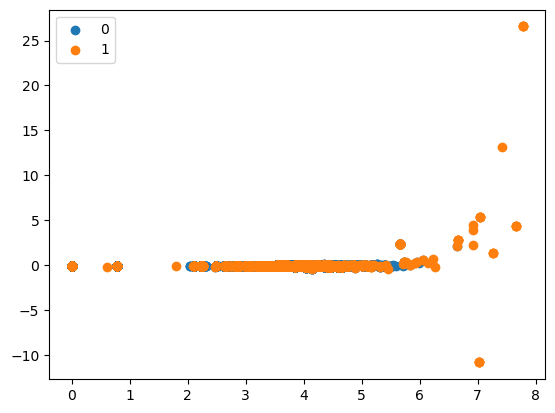

In [101]:
# define dataset
X = df.drop('Link', axis=1, inplace=False).values
y = df['Link'].values.ravel()
# summarize class distribution
counter = Counter(y)
print(counter)
# define the undersampling method
undersample = NearMiss(version=1, n_neighbors=3, sampling_strategy=0.1)
# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

#### NearMiss-2

In [102]:
# Went out of memory

#### NearMiss-3

In [103]:
# Didn't show different scores

# # define dataset
# X = df.drop('Link', axis=1, inplace=False).values
# y = df['Link'].values.ravel()
# # summarize class distribution
# counter = Counter(y)
# print(counter)
# # define the undersampling method
# undersample = NearMiss(version=3, n_neighbors_ver3=3, sampling_strategy=0.1)
# # transform the dataset
# X, y = undersample.fit_resample(X, y)
# # summarize the new class distribution
# counter = Counter(y)
# print(counter)
# # scatter plot of examples by class label
# for label, _ in counter.items():
#     row_ix = where(y == label)[0]
#     pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
# pyplot.legend()
# pyplot.show()

#### Condensed Nearest Neighbor Rule Undersampling

In [104]:
# It’s a relatively slow procedure, so small datasets and small k values are preferred. 
# It takes very longe long time to calculate - has been tested only for an hour.

# define the undersampling method
# undersample = CondensedNearestNeighbour(n_neighbors=1)

### Train/test split

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

## Modelling

In [106]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import scale
from sklearn.model_selection import GridSearchCV

In [107]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve(y_true_bin, y_pred_proba):
    fpr, tpr, thresholds = roc_curve(y_true_bin, y_pred_proba)
    plt.plot(fpr, tpr, label = "AUC = %.2f" % roc_auc_score(y_true_bin, y_pred_proba))
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC")
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.legend(loc="lower right", prop={'size':15})
    plt.show()
    
def get_features_importance (optimal_model,X_train):
    '''
    shows the graph of feature importance
    '''
    features = df.columns[:-1]
    importances = optimal_model.feature_importances_
    indices = np.argsort(importances)

    plt.figure(figsize=(15,10))
    plt.title('Feature Importance')
    plt.barh(range(len(indices)), importances[indices], color='red', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')

    plt.show()

### Logistic Classification (NearMiss-1)

#### Base

In [108]:
# X_train is additionally scaled because of still existing outliers that return warning

# Don't understand why confusion matrix uses 0's for true positives and not 1's

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     15456
           1       0.91      0.71      0.79      1546

    accuracy                           0.97     17002
   macro avg       0.94      0.85      0.89     17002
weighted avg       0.97      0.97      0.96     17002

Confusion matrix:
[[15346   110]
 [  454  1092]]


ROC-AUC curve:


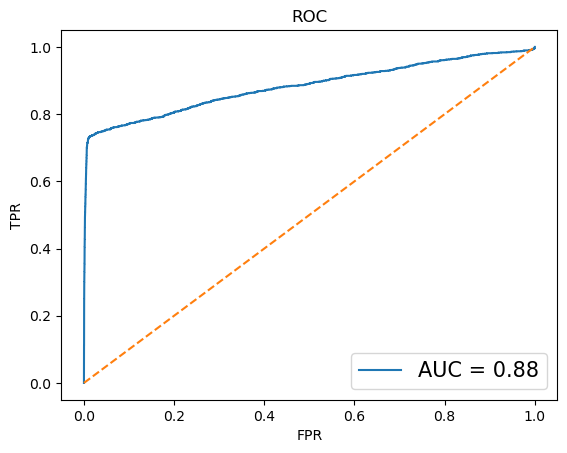

In [109]:
from sklearn.linear_model import LogisticRegression

base_lr = LogisticRegression()
base_lr.fit(scale(X_train), y_train)

y_pred = base_lr.predict(scale(X_test))
print(classification_report(y_test, y_pred))

print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))

print('\n')
print('ROC-AUC curve:')
y_pred_proba = base_lr.predict_proba(scale(X_test))
plot_roc_curve(y_test, y_pred_proba[:, 1])

#### Grid Search

In [110]:
# grid = {"C":np.logspace(-3,3,7), 
#       "penalty":["l1","l2"], 
#       'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] }

# logreg = LogisticRegression()
# logreg_cv = GridSearchCV(logreg,grid,cv=10, scoring='roc_auc')
# logreg_cv.fit(scale(X_train),y_train)

# print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
# print("accuracy :",logreg_cv.best_score_)

## Results with:
## tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
## accuracy : 0.966120494076128

## tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}
## AUC : 0.8823170499544698

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     15456
           1       0.91      0.71      0.80      1546

    accuracy                           0.97     17002
   macro avg       0.94      0.85      0.89     17002
weighted avg       0.97      0.97      0.97     17002

Confusion matrix:
[[15354   102]
 [  456  1090]]


ROC-AUC curve:


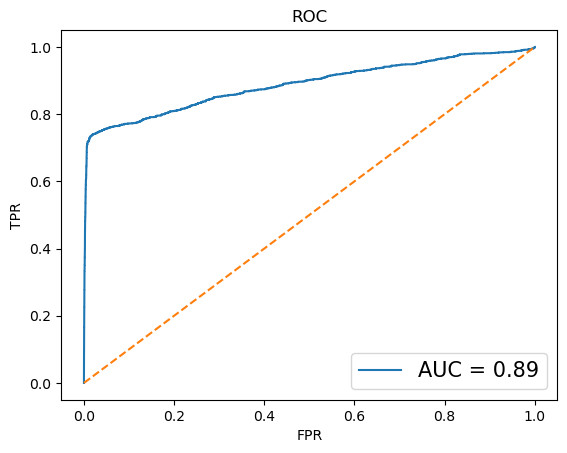

In [111]:
from sklearn.linear_model import LogisticRegression

lr_best = LogisticRegression(C=0.001, penalty='l2', solver= 'lbfgs')
lr_best.fit(scale(X_train), y_train)

y_pred = lr_best.predict(scale(X_test))
print(classification_report(y_test, y_pred))

print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))

print('\n')
print('ROC-AUC curve:')
y_pred_proba = lr_best.predict_proba(scale(X_test))
plot_roc_curve(y_test, y_pred_proba[:, 1])

### Random Forest Classifier (NearMiss-1)

In [112]:
from sklearn.ensemble import RandomForestClassifier

#### Base

In [113]:
base_forest = RandomForestClassifier()
base_forest.fit(X_train, y_train)

RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     15456
           1       0.99      0.78      0.87      1546

    accuracy                           0.98     17002
   macro avg       0.98      0.89      0.93     17002
weighted avg       0.98      0.98      0.98     17002

Confusion matrix:
[[15441    15]
 [  334  1212]]


ROC-AUC curve:


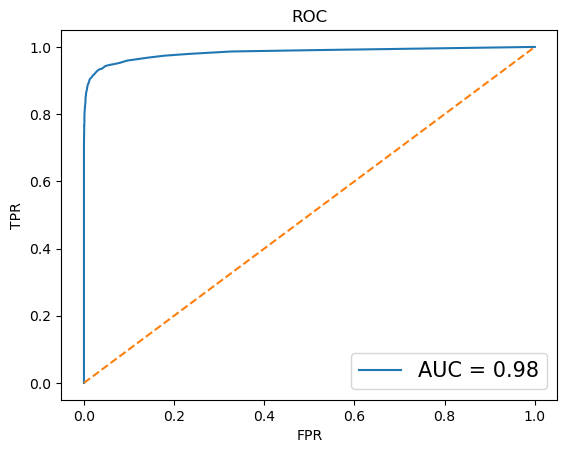

In [114]:
# Make predictions for the test set
y_pred = base_forest.predict(X_test)
print(classification_report(y_test, y_pred))

print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))

print('\n')
print('ROC-AUC curve:')
y_pred_proba = base_forest.predict_proba(X_test)
plot_roc_curve(y_test, y_pred_proba[:, 1])

#### Grid Search

##### Scoring accuracy

In [115]:
# rfc = RandomForestClassifier(random_state=42)

# param_grid = { 
#     'n_estimators': [100, 200],
#     'max_features': ['sqrt', 'log2'],
#     'max_depth' : [4,5,6,7,8],
#     'criterion' :['gini', 'entropy']
# }

# CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
# CV_rfc.fit(X_train, y_train)

In [116]:
# CV_rfc.best_params_

##### Scoring 'roc_auc'

In [117]:
# rfc = RandomForestClassifier(random_state=42)

# param_grid = { 
#     'n_estimators': [100, 200],
#     'max_features': ['sqrt', 'log2'],
#     'max_depth' : [4,5,6,7,8],
#     'criterion' :['gini', 'entropy']
# }

# CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, scoring='roc_auc')
# CV_rfc.fit(X_train, y_train)

In [118]:
# # Exactly the same params
# CV_rfc.best_params_

#### Best model

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     15456
           1       0.99      0.73      0.84      1546

    accuracy                           0.97     17002
   macro avg       0.98      0.86      0.91     17002
weighted avg       0.98      0.97      0.97     17002

Confusion matrix:
[[15447     9]
 [  421  1125]]


ROC-AUC curve:


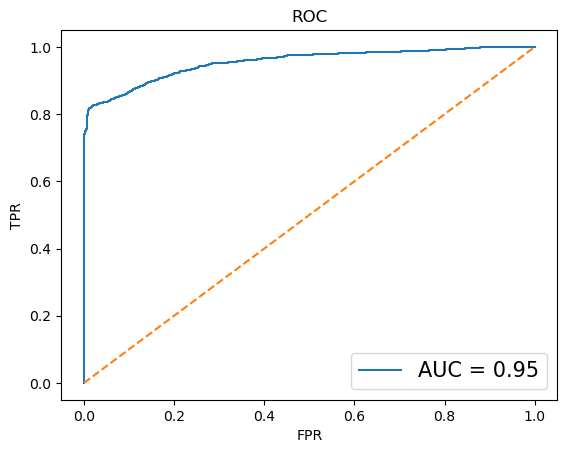

In [119]:
rfc_best = RandomForestClassifier(random_state=42, 
                              max_features='sqrt', 
                              n_estimators= 200,
                              max_depth=8, 
                              criterion='entropy')

rfc_best.fit(X_train, y_train)
y_pred = rfc_best.predict(X_test)
print(classification_report(y_test, y_pred))

print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))

print('\n')
print('ROC-AUC curve:')
y_pred_proba = rfc_best.predict_proba(X_test)
plot_roc_curve(y_test, y_pred_proba[:, 1])

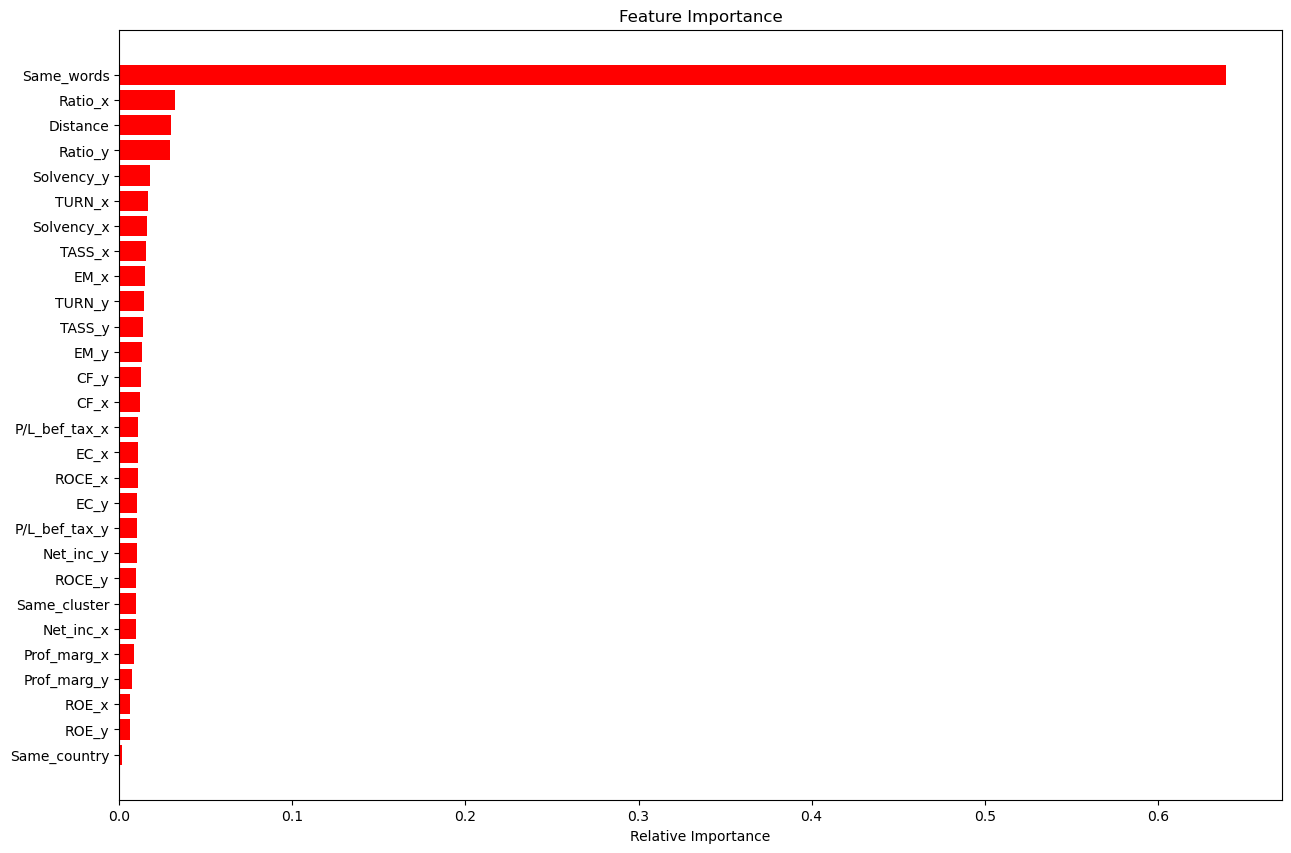

In [120]:
#getting features importance of random forest
get_features_importance(rfc_best,X_train)

### Gradient Boosting (NearMiss-1)

In [121]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier

import sklearn
print(sklearn.__version__)

1.1.3


In [122]:
# define the model
gbc = GradientBoostingClassifier()
# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
# evaluate the model on the dataset
n_scores = cross_val_score(gbc, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Mean Accuracy: 0.974 (0.002)


#### Base

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     15456
           1       0.97      0.73      0.84      1546

    accuracy                           0.97     17002
   macro avg       0.97      0.87      0.91     17002
weighted avg       0.97      0.97      0.97     17002

Confusion matrix:
[[15424    32]
 [  411  1135]]


ROC-AUC curve:


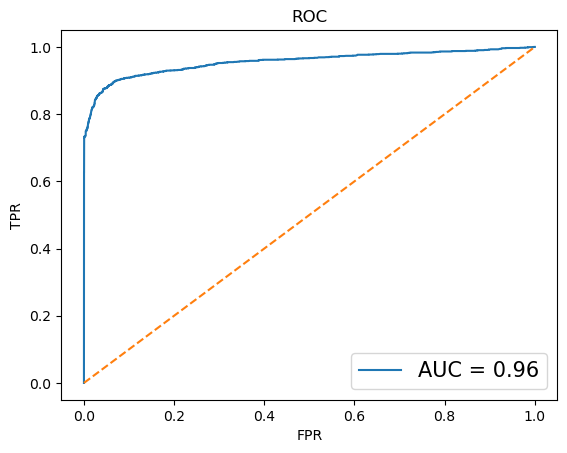

In [123]:
gbc.fit(X, y)

y_pred = gbc.predict(X_test)
print(classification_report(y_test, y_pred))

print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))

print('\n')
print('ROC-AUC curve:')
y_pred_proba = gbc.predict_proba(X_test)
plot_roc_curve(y_test, y_pred_proba[:, 1])

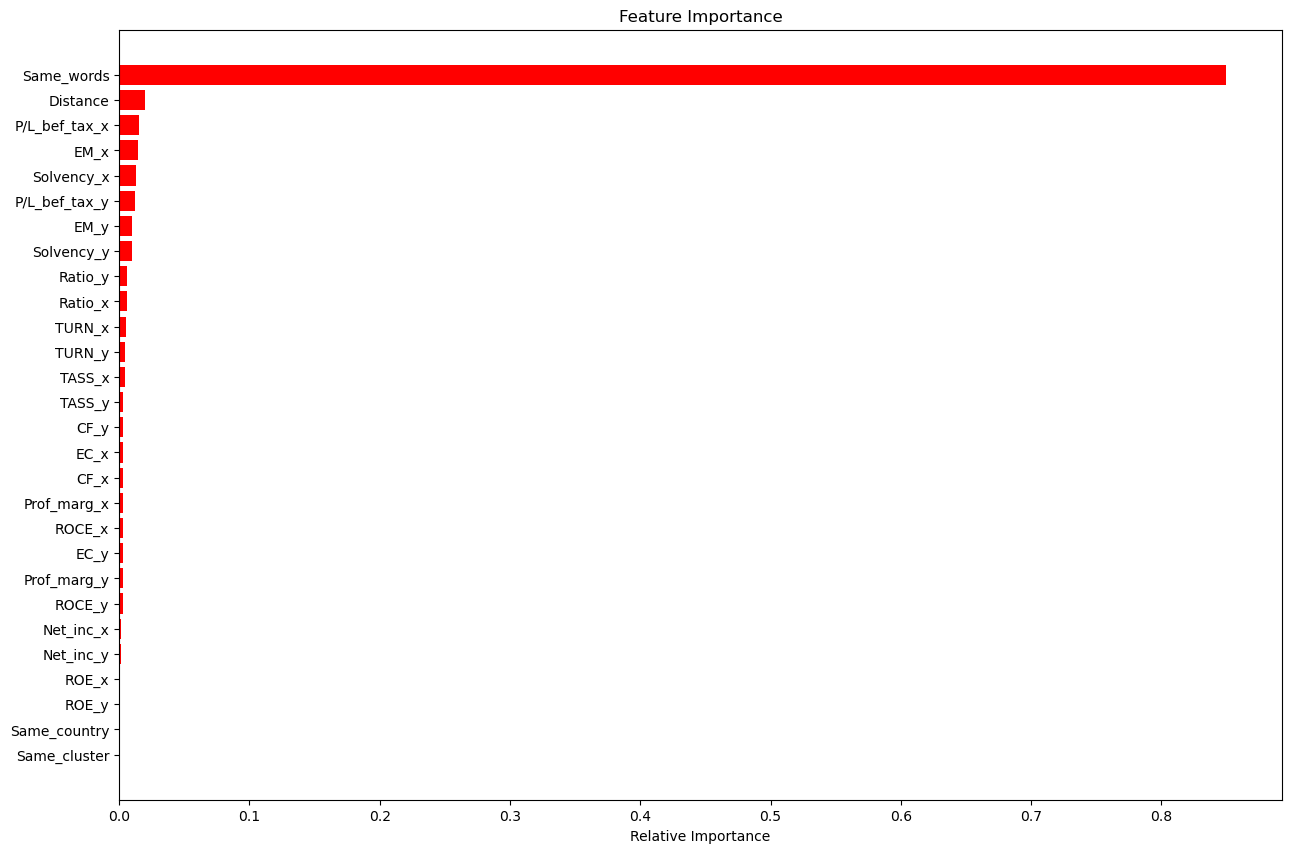

In [124]:
#getting features importance of gradient boosting
get_features_importance(gbc,X_train)

#### Grid Search

In [125]:
# Takes too long to calculate for now

In [126]:
# # define the model with default hyperparameters
# model = GradientBoostingClassifier()
# # define the grid of values to search
# grid = dict()
# grid['n_estimators'] = [10, 50, 100, 500]
# grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
# grid['subsample'] = [0.5, 0.7, 1.0]
# grid['max_depth'] = [3, 7, 9]
# # define the evaluation procedure
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
# # define the grid search procedure
# grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc')
# # execute the grid search
# grid_result = grid_search.fit(scale(X), y)
# # summarize the best score and configuration
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# # summarize all scores that were evaluated
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

## Re-Modelling for feature importance

In [127]:
# Get the same final dataset, but remove the 'Same_words' feature
df.drop('Same_words', axis=1, inplace = True)

# define dataset
X = df.drop('Link', axis=1, inplace=False).values
y = df['Link'].values.ravel()
# summarize class distribution
counter = Counter(y)
print(counter)
# define the undersampling method
undersample = NearMiss(version=1, n_neighbors=3, sampling_strategy=0.1)
# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

Counter({0: 1369604, 1: 5152})
Counter({0: 51520, 1: 5152})


### RF Best-model

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     15456
           1       0.97      0.02      0.05      1546

    accuracy                           0.91     17002
   macro avg       0.94      0.51      0.50     17002
weighted avg       0.92      0.91      0.87     17002

Confusion matrix:
[[15455     1]
 [ 1510    36]]


ROC-AUC curve:


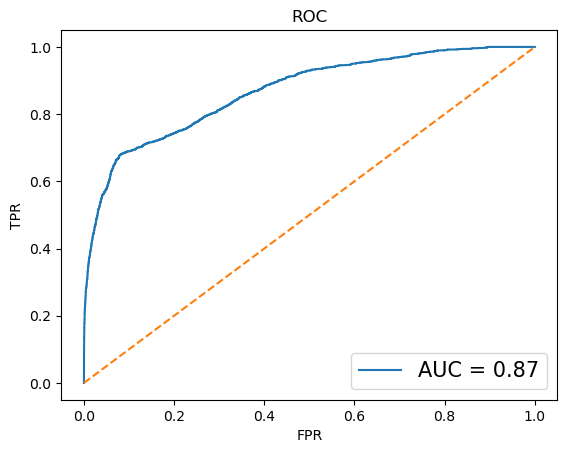

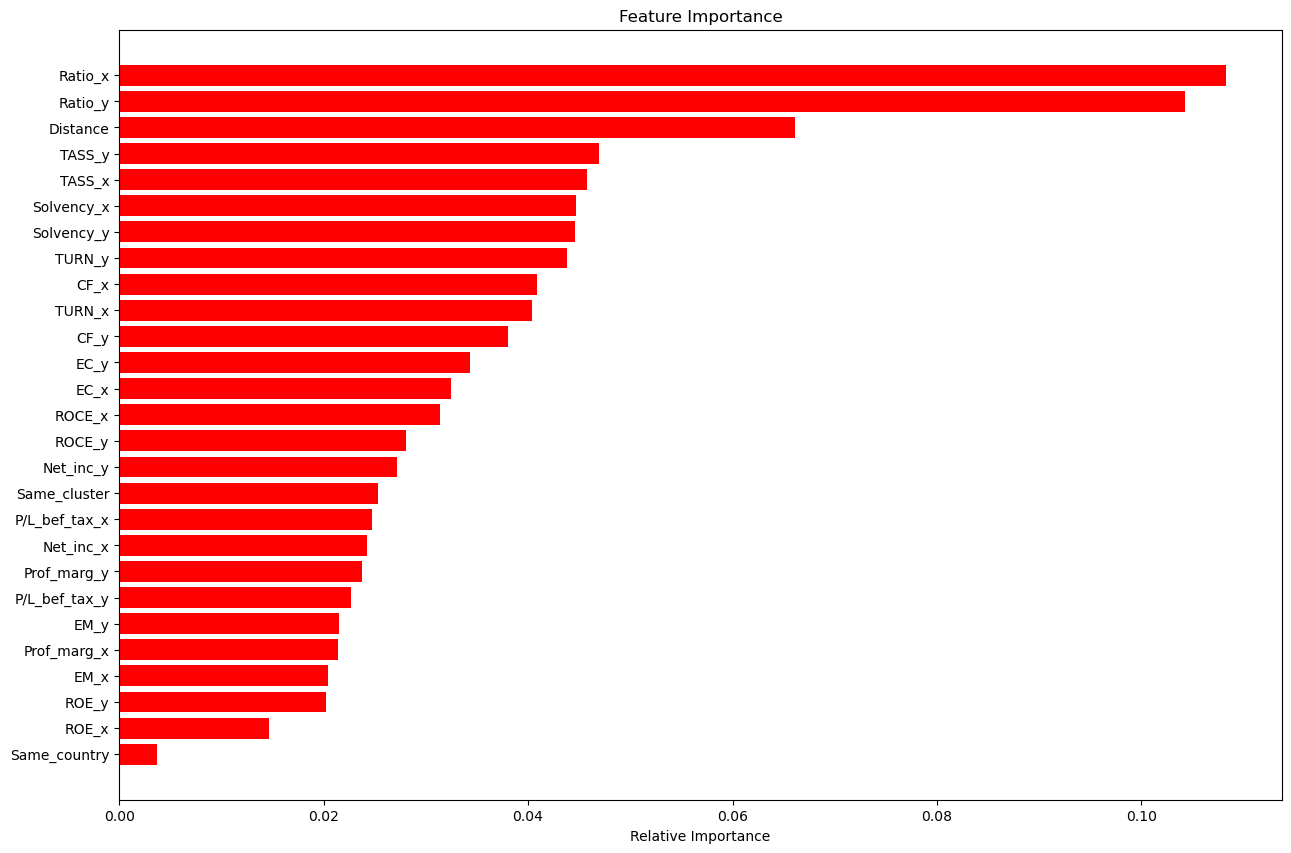

In [128]:
rfc_best = RandomForestClassifier(random_state=42, 
                              max_features='sqrt', 
                              n_estimators= 200,
                              max_depth=8, 
                              criterion='entropy')

rfc_best.fit(X_train, y_train)
y_pred = rfc_best.predict(X_test)
print(classification_report(y_test, y_pred))

print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))

print('\n')
print('ROC-AUC curve:')
y_pred_proba = rfc_best.predict_proba(X_test)
plot_roc_curve(y_test, y_pred_proba[:, 1])

#getting features importance of random forest
get_features_importance(rfc_best,X_train)

### Gradient Boosting

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     15456
           1       0.99      0.14      0.25      1546

    accuracy                           0.92     17002
   macro avg       0.95      0.57      0.60     17002
weighted avg       0.93      0.92      0.89     17002

Confusion matrix:
[[15453     3]
 [ 1328   218]]


ROC-AUC curve:


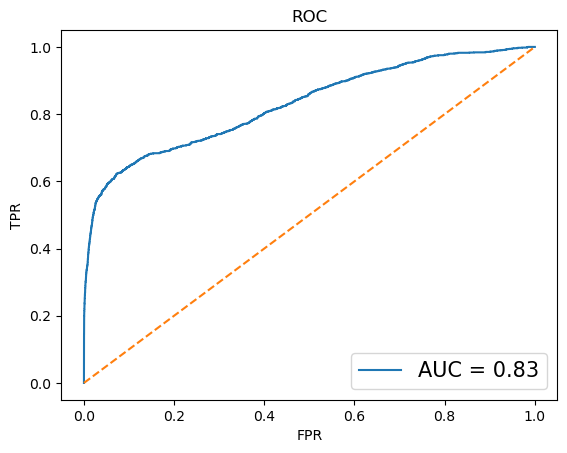

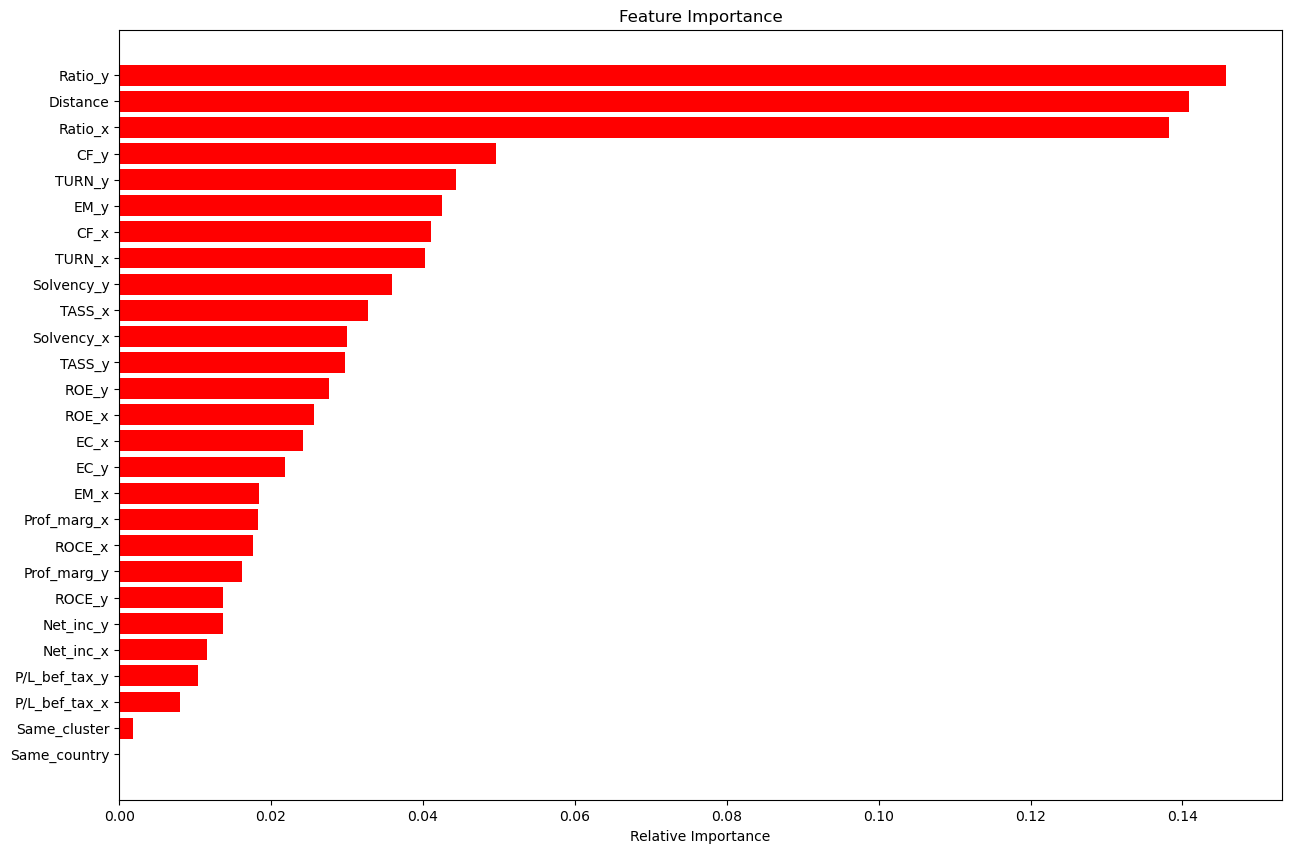

In [129]:
gbc.fit(X, y)

y_pred = gbc.predict(X_test)
print(classification_report(y_test, y_pred))

print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))

print('\n')
print('ROC-AUC curve:')
y_pred_proba = gbc.predict_proba(X_test)
plot_roc_curve(y_test, y_pred_proba[:, 1])

#getting features importance of gradient boosting
get_features_importance(gbc,X_train)